In [262]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.1
pandas version :  1.1.3
seaborn version :  0.11.0


In [263]:
!pip3 install xgboost

In [264]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [265]:
#mengambil data csv
df = pd.read_csv("Invistico_Airline.csv")

#melihat contoh data dari dataframe
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [266]:
df.shape

(129880, 23)

In [267]:
df_targets = df.groupby("satisfaction").agg({"Gate location" : "count"}).reset_index()
df_targets

,satisfaction,Gate location
0,dissatisfied,58793
1,satisfied,71087


In [268]:
df_targets.columns = ['satisfaction','total']
df_targets["jumlah"] = sum(df_targets["total"])
df_targets['percentage'] = df_targets['total']/df_targets['jumlah']*100
df_targets

,satisfaction,total,jumlah,percentage
0,dissatisfied,58793,129880,45.26717
1,satisfied,71087,129880,54.73283


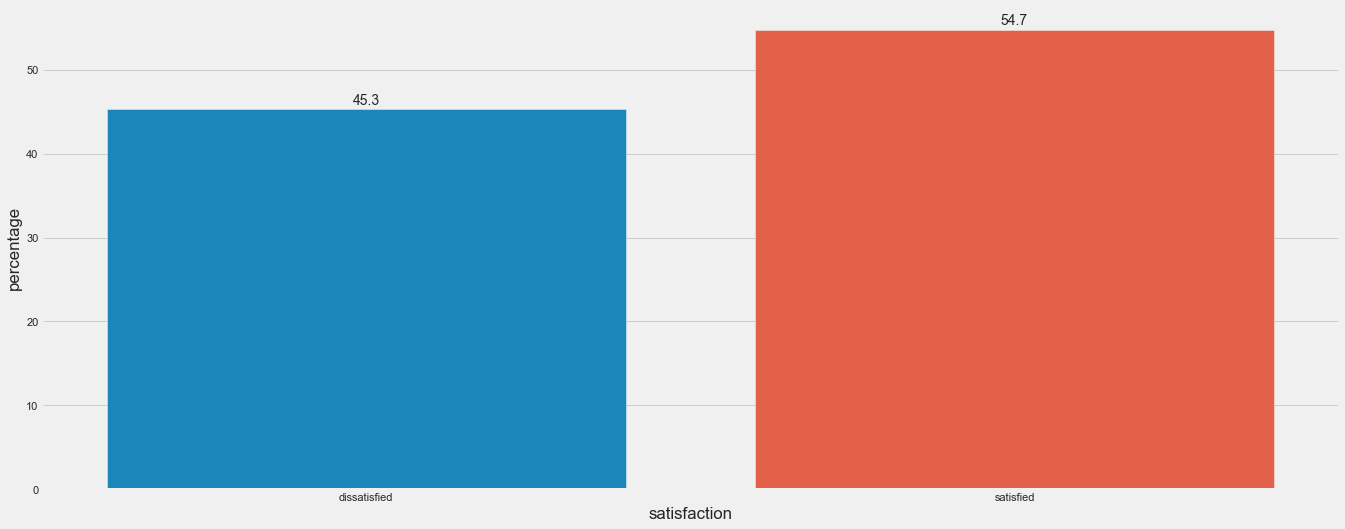

In [269]:
splot = sns.barplot(x='satisfaction',y='percentage',data=df_targets)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.savefig("satisfaction persen")

## Get Personal Type Only

In [270]:
df = df[df["Type of Travel"] == "Personal Travel"]
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [271]:
df.shape

(40187, 23)

In [272]:
df = df.drop("Type of Travel", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40187 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       40187 non-null  object 
 1   Gender                             40187 non-null  object 
 2   Customer Type                      40187 non-null  object 
 3   Age                                40187 non-null  int64  
 4   Class                              40187 non-null  object 
 5   Flight Distance                    40187 non-null  int64  
 6   Seat comfort                       40187 non-null  int64  
 7   Departure/Arrival time convenient  40187 non-null  int64  
 8   Food and drink                     40187 non-null  int64  
 9   Gate location                      40187 non-null  int64  
 10  Inflight wifi service              40187 non-null  int64  
 11  Inflight entertainment             40187 non-null  in

Hanya Mengambil data customer personal type, dikarenakan pada masa pandemi Covid ini penerbangan karena business berkurang sebanyak 90%

### Cek Target Percentage

In [273]:
df_target = df.groupby("satisfaction").agg({"Gender" : "count"}).reset_index()
df_target.head()

,satisfaction,Gender
0,dissatisfied,21456
1,satisfied,18731


In [274]:
df_target.columns = ["satisfaction", "jumlah"]
df_target["total"] = sum(df_target['jumlah'])
df_target["percentage"] = df_target["jumlah"] / df_target["total"] * 100
df_target.head()

,satisfaction,jumlah,total,percentage
0,dissatisfied,21456,40187,53.3904
1,satisfied,18731,40187,46.6096


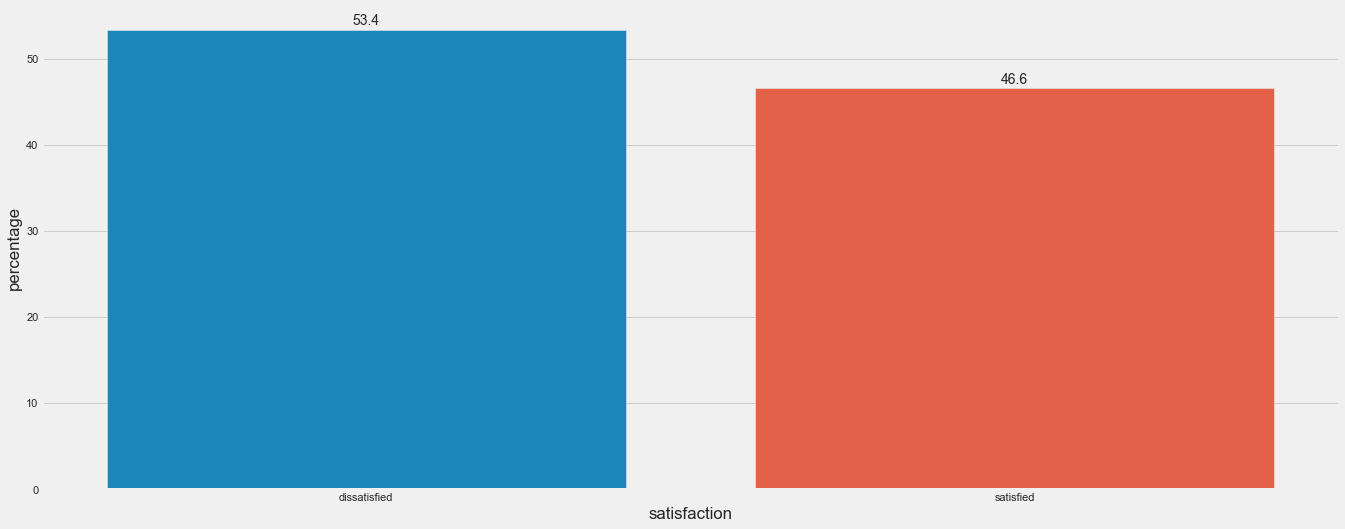

In [275]:
splot = sns.barplot(x='satisfaction',y='percentage',data=df_target)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

berdasarkan data diatas dapat dilihat bahwa untuk personal type memiliki nilai dissatisfied yang tinggi yaitu 53.4%

## Cek data Description

### numerical data

In [276]:
#melakukan pengecekan untuk data numerical
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0


### Categorical Data

In [277]:
#melakukan pengecekan untuk categorical data
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,satisfaction,Gender,Customer Type,Class
0,satisfied,Female,Loyal Customer,Eco
1,satisfied,Male,Loyal Customer,Business
2,satisfied,Female,Loyal Customer,Eco


## Pembagian Data

In [278]:
num = ["Age","Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
ordinal = ["Seat comfort", "Departure/Arrival time convenient", "Food and drink", "Gate location", "Inflight wifi service", "Inflight entertainment", "Online support", "Ease of Online booking", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Cleanliness", "Online boarding"]
category = ["Gender", "Customer Type", "Class"]

# EDA

### Data Approach

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40187 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       40187 non-null  object 
 1   Gender                             40187 non-null  object 
 2   Customer Type                      40187 non-null  object 
 3   Age                                40187 non-null  int64  
 4   Class                              40187 non-null  object 
 5   Flight Distance                    40187 non-null  int64  
 6   Seat comfort                       40187 non-null  int64  
 7   Departure/Arrival time convenient  40187 non-null  int64  
 8   Food and drink                     40187 non-null  int64  
 9   Gate location                      40187 non-null  int64  
 10  Inflight wifi service              40187 non-null  int64  
 11  Inflight entertainment             40187 non-null  in

In [280]:
#numerical describe
df_numeric = df.drop(["Seat comfort", "Departure/Arrival time convenient", "Food and drink", "Gate location", "Inflight wifi service", "Inflight entertainment", "Online support", "Ease of Online booking", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Cleanliness", "Online boarding","Gender", "Customer Type", "Class"], axis=1)
describeNum = df_numeric.describe()
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Age,40187.000000,38.415856,18.483795,7.000000,22.000000,38.000000,54.000000,70.000000
Flight Distance,40187.000000,1793.036181,854.492136,50.000000,1266.000000,1813.000000,2287.000000,6924.000000
Departure Delay in Minutes,40187.000000,14.377386,37.761743,0.000000,0.000000,0.000000,12.000000,1592.000000
Arrival Delay in Minutes,40042.000000,14.755981,38.129509,0.000000,0.000000,0.000000,13.000000,1584.000000


In [281]:
#ordinal describe
df_ordinal = df.drop(["Age","Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes","Gender", "Customer Type", "Class"], axis=1)
describeOrd = df_ordinal.describe()
describeOrd.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Seat comfort,40187.000000,2.873641,1.383729,0.000000,2.000000,3.000000,4.000000,5.000000
Departure/Arrival time convenient,40187.000000,3.427626,1.455628,0.000000,2.000000,4.000000,5.000000,5.000000
Food and drink,40187.000000,2.783512,1.432575,0.000000,2.000000,3.000000,4.000000,5.000000
Gate location,40187.000000,2.963496,1.239774,0.000000,2.000000,3.000000,4.000000,5.000000
Inflight wifi service,40187.000000,3.211063,1.340351,0.000000,2.000000,3.000000,4.000000,5.000000
Inflight entertainment,40187.000000,3.223455,1.418583,0.000000,2.000000,4.000000,4.000000,5.000000
Online support,40187.000000,3.442830,1.372797,1.000000,2.000000,4.000000,5.000000,5.000000
Ease of Online booking,40187.000000,3.421803,1.344478,1.000000,2.000000,4.000000,5.000000,5.000000
On-board service,40187.000000,3.533232,1.248384,1.000000,3.000000,4.000000,5.000000,5.000000
Leg room service,40187.000000,3.512728,1.285001,0.000000,3.000000,4.000000,5.000000,5.000000


In [282]:
#category describe
describeCat = df.describe(include=["O"])
describeCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
satisfaction,40187,2,dissatisfied,21456
Gender,40187,2,Female,20105
Customer Type,40187,2,Loyal Customer,39986
Class,40187,3,Eco,33005


dari data diatas  dapat dilihat bahwa :
1. data null hanya terdapat di Arrival time in minutes
2. dari data service yang ada, rata2 tingkat kepuasan customer pada service tersebut adalah 3 (normal)
3. class yangpaling banyak di gunakan adalah class Eco

## Univariate Analysis

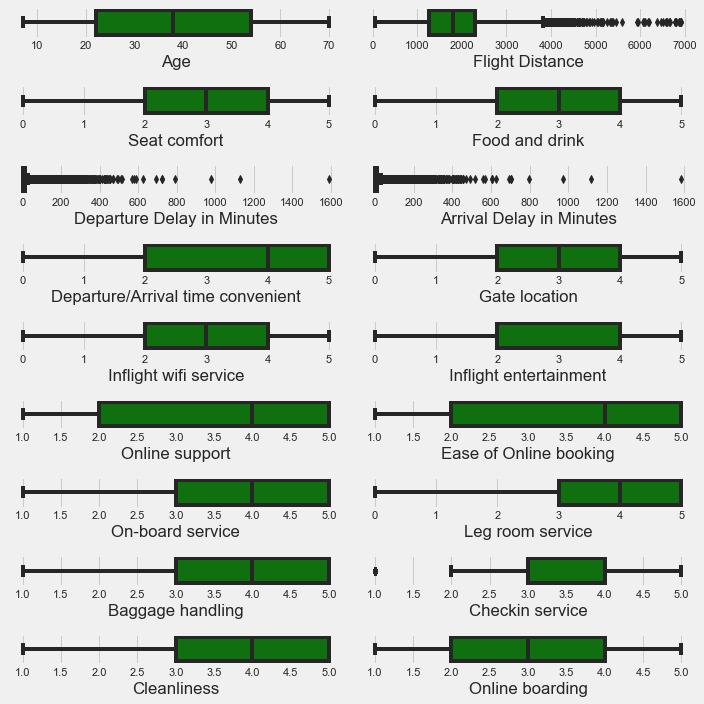

In [283]:
features = ["Age",'Flight Distance', 'Seat comfort', 'Food and drink', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient','Gate location','Inflight wifi service','Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness','Online boarding']
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(len(features)/2, 2, i+1)
    sns.boxplot(df[features[i]],orient='h',color='green')
    plt.tight_layout()

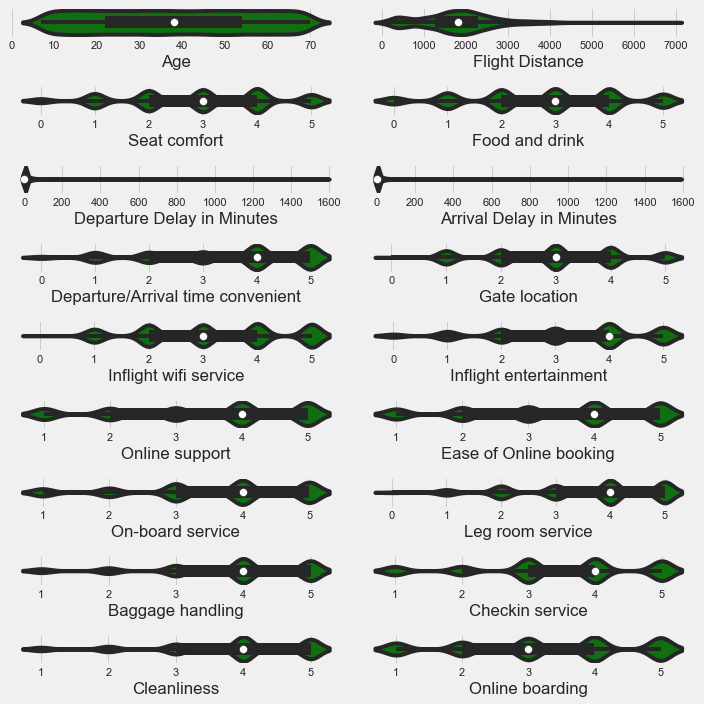

In [284]:
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(len(features)/2, 2, i+1)
    sns.violinplot(df[features[i]],orient='h',color='green')
    plt.tight_layout()

dari analisa outlier menggunakan boxplot dan violin plot, kita dapat melihat terdapat 3 feature yang memiliki outlier
1. Departure Delay in Minutes
2. Arrival Delay in Minutes
3. Flight Distance

In [285]:
data_cat_unique = df_cat.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False)
data_cat_unique

,feature,unique value
3,Class,3
0,satisfaction,2
1,Gender,2
2,Customer Type,2


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

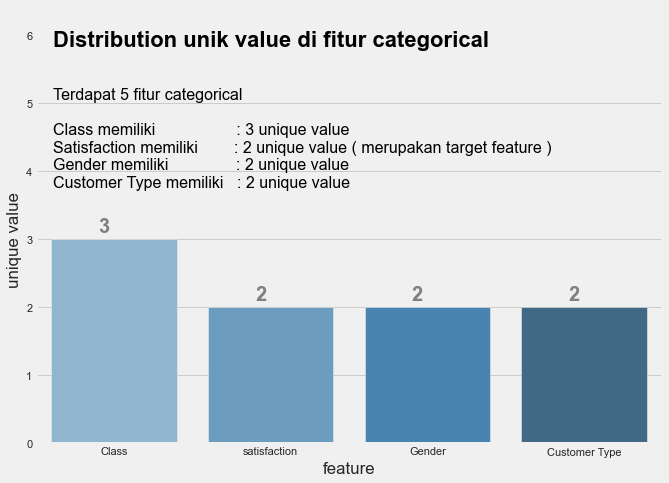

In [286]:
fig, ax = plt.subplots(figsize=(10,7))

g = sns.barplot(x = 'feature',y='unique value',data=data_cat_unique,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=5, desat=1))

x = np.arange(len(data_cat_unique['feature']))
y = data_cat_unique['unique value']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+0.1, str(v), fontsize = 20, color='gray', fontweight='bold')
    
title = '''
Distribution unik value di fitur categorical
'''
ax.text(-0.39,5.5,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')
    

text = '''
Terdapat 5 fitur categorical

Class memiliki                  : 3 unique value
Satisfaction memiliki        : 2 unique value ( merupakan target feature )
Gender memiliki               : 2 unique value
Customer Type memiliki   : 2 unique value


''' 
ax.text(-0.39,3,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,6)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

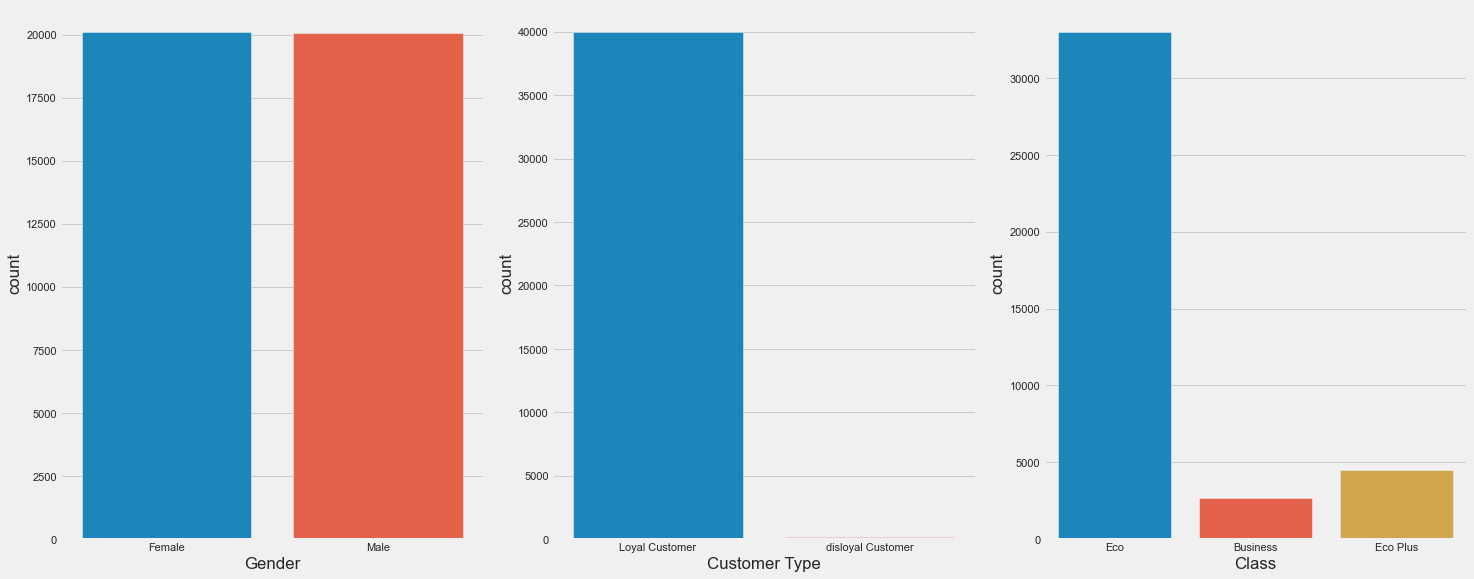

In [287]:
#sebaran data category
cats = ["Gender", "Customer Type", "Class"]
for i in range(0, len(cats)):
    plt.subplot(1, 3, i+1)
    sns.countplot(cats[i], orient='v', data=df)
    plt.tight_layout()

Disini terdapat informasi bahwa feature Customer Type hanya memiliki data Loyal Customer sehingga kita bisa menghapus feature tersebut nanti nya

## Multivariate Analysis

In [288]:
#check feature correlation
corelation = df.corr()
corelation

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.334617,-0.008213,0.001983,-0.004630,0.000376,0.015588,0.016335,0.044516,0.006258,-0.016059,0.012888,-0.040342,0.002330,-0.038283,0.022382,-0.006348,-0.007791
Flight Distance,-0.334617,1.000000,-0.093830,0.042883,-0.062130,-0.009164,-0.082412,-0.174056,-0.154441,-0.090930,-0.047709,-0.063667,0.025206,-0.044882,0.015097,-0.098018,0.107482,0.101560
Seat comfort,-0.008213,-0.093830,1.000000,0.262612,0.819762,0.320624,0.055208,0.473359,0.051544,0.083357,0.039525,0.139412,0.015909,-0.012308,0.015242,0.039094,-0.050209,-0.050339
Departure/Arrival time convenient,0.001983,0.042883,0.262612,1.000000,0.265339,0.300673,-0.038009,-0.061135,-0.060210,-0.074202,0.110406,0.004999,0.136020,0.157413,0.140374,-0.037249,0.011993,0.011179
Food and drink,-0.004630,-0.062130,0.819762,0.265339,1.000000,0.312364,0.048887,0.559859,0.054898,0.051287,0.037250,0.151571,0.021024,0.014669,0.021367,0.033307,-0.050549,-0.050029
Gate location,0.000376,-0.009164,0.320624,0.300673,0.312364,1.000000,0.004727,0.013510,0.016750,0.011298,-0.034660,-0.008495,0.008044,-0.045729,0.001393,0.004706,-0.002073,-0.001024
Inflight wifi service,0.015588,-0.082412,0.055208,-0.038009,0.048887,0.004727,1.000000,0.145030,0.588273,0.671839,0.016301,0.002847,-0.001373,0.040502,0.006842,0.708081,-0.074080,-0.074483
Inflight entertainment,0.016335,-0.174056,0.473359,-0.061135,0.559859,0.013510,0.145030,1.000000,0.320887,0.193780,0.100968,0.121736,0.039517,0.150941,0.035615,0.242991,-0.031455,-0.028717
Online support,0.044516,-0.154441,0.051544,-0.060210,0.054898,0.016750,0.588273,0.320887,1.000000,0.617203,0.071825,0.084941,0.024357,0.138547,0.021602,0.693750,-0.035235,-0.031407
Ease of Online booking,0.006258,-0.090930,0.083357,-0.074202,0.051287,0.011298,0.671839,0.193780,0.617203,1.000000,0.325137,0.211829,0.288274,0.039244,0.316253,0.719498,0.000037,0.000863


<AxesSubplot:>

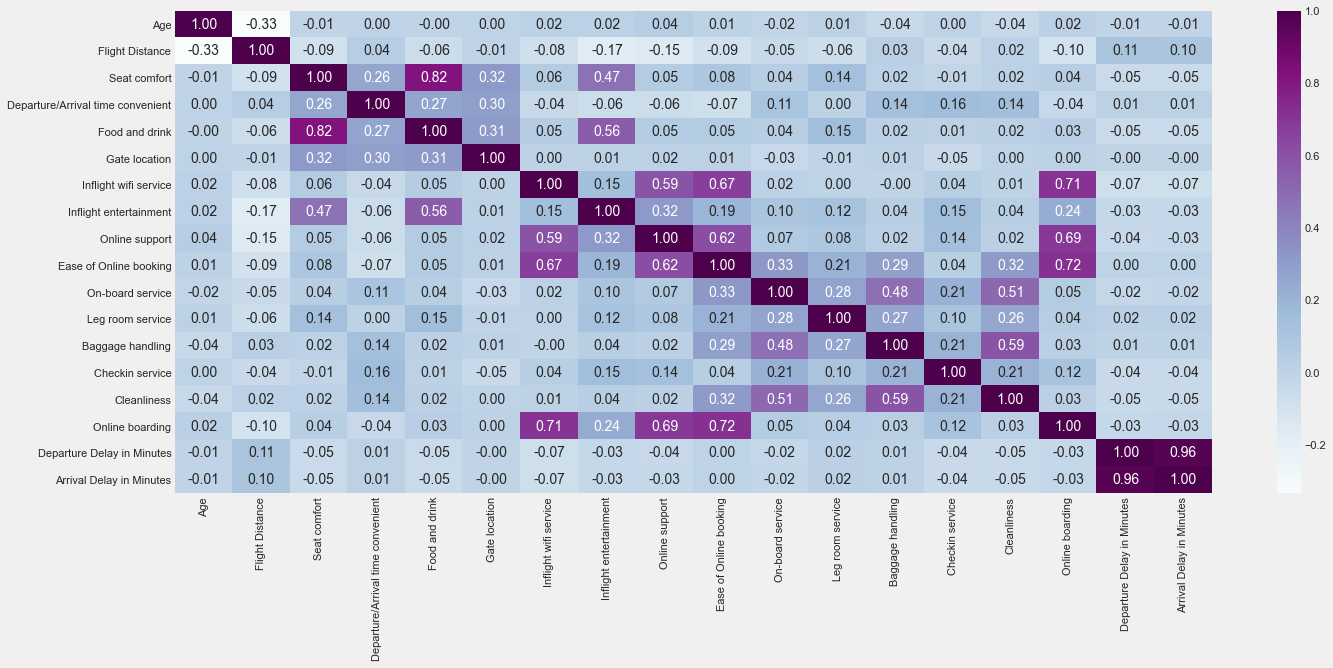

In [289]:
#use heatmap to show the correlation
sns.heatmap(corelation, annot=True, fmt = ".2f", cmap = "BuPu" )

Dari melihat hubungan feature dengan feature lain, dapat disimpulkan bahwa :
1. Departure Delay dan Arrival Delay memiliki nilai korelasi > 90%, maka kita dapat menghapus salah satu dari feature tersebut
2. Terdapat juga beberapa feature yang memiliki korelasi yang tinggi tetapi < 90% :
- Food and drink dan Seat Comfort (82%)
- Online Boarding dengan Online Support (72%)
- Online Boarding dengan Inflight Wifi Service (71%)

## Hubungan Feature Dengan Target

Non Numeric

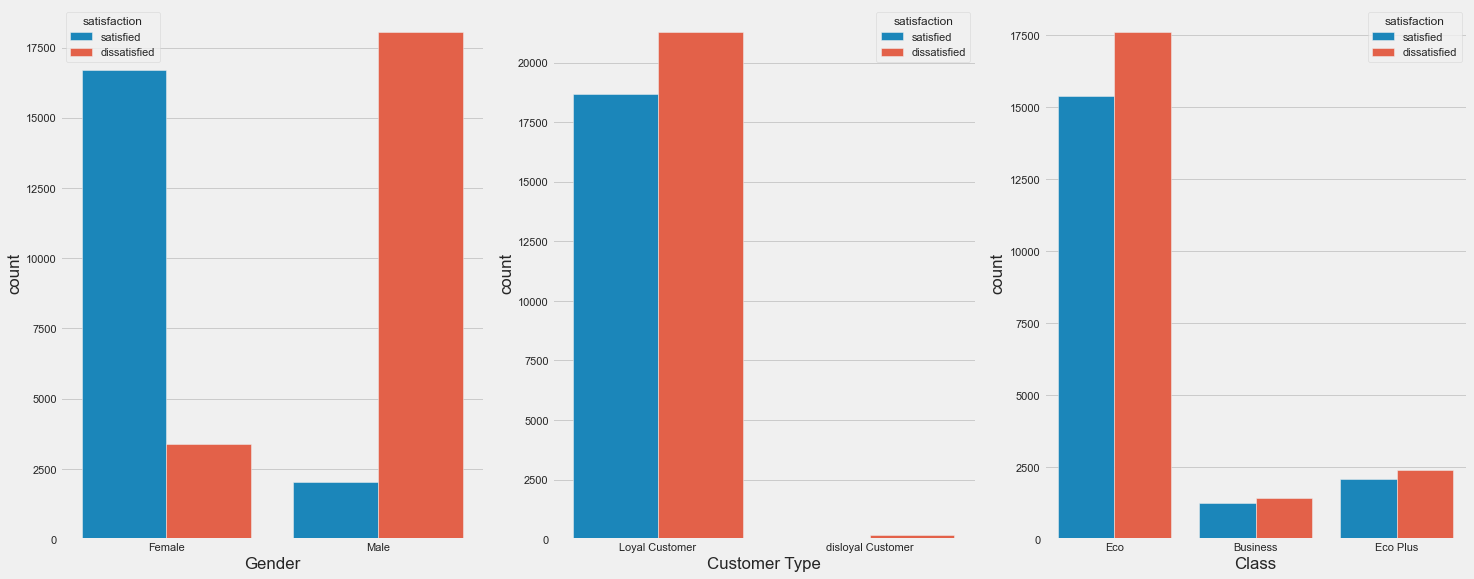

In [290]:
cats = ["Gender", "Customer Type", "Class"]
for i in range(0, len(cats)):
    plt.subplot(1, 3, i+1)
    sns.countplot(cats[i], hue = "satisfaction", orient='v', data=df)
    plt.tight_layout()

Melihat dari data diatas kita dapat melihat :
1. Male lebih sering tidak satisfied dengan Invistico, dimana Female masih dalam keadaan satisfied
2. walaupun customer merupakan loyal customer, akan tetapi customer tetap tidak puas dengan Invistico
3. untuk feature Class masih perlu di lihat lebih detail lagi

In [291]:
data_class = df.groupby(["satisfaction","Class"]).agg({"Seat comfort" : "count"}).reset_index()
data_class

,satisfaction,Class,Seat comfort
0,dissatisfied,Business,1431
1,dissatisfied,Eco,17610
2,dissatisfied,Eco Plus,2415
3,satisfied,Business,1242
4,satisfied,Eco,15395
5,satisfied,Eco Plus,2094


In [292]:
data_class.columns = ["satisfaction", "class", "jumlah"]
data_class["total"] = data_class.groupby(['class'])['jumlah'].transform('sum')
data_class["percentage"] = data_class["jumlah"] / data_class["total"] * 100
data_class

,satisfaction,class,jumlah,total,percentage
0,dissatisfied,Business,1431,2673,53.535354
1,dissatisfied,Eco,17610,33005,53.355552
2,dissatisfied,Eco Plus,2415,4509,53.559548
3,satisfied,Business,1242,2673,46.464646
4,satisfied,Eco,15395,33005,46.644448
5,satisfied,Eco Plus,2094,4509,46.440452


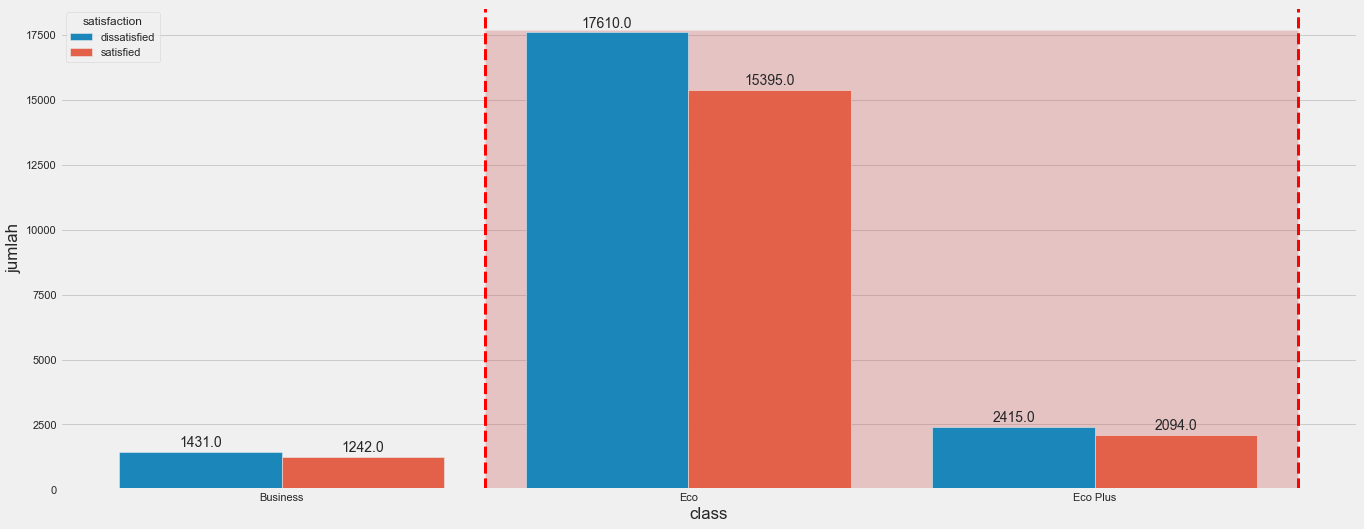

In [293]:
splot = sns.barplot(x='class',y='jumlah',hue = "satisfaction",data=data_class)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.stackplot(np.arange(0.5, 3 ,0.5), [[17700]], colors=('indianred',), alpha=0.3)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=2.5, color='red', linestyle='--', linewidth=3)

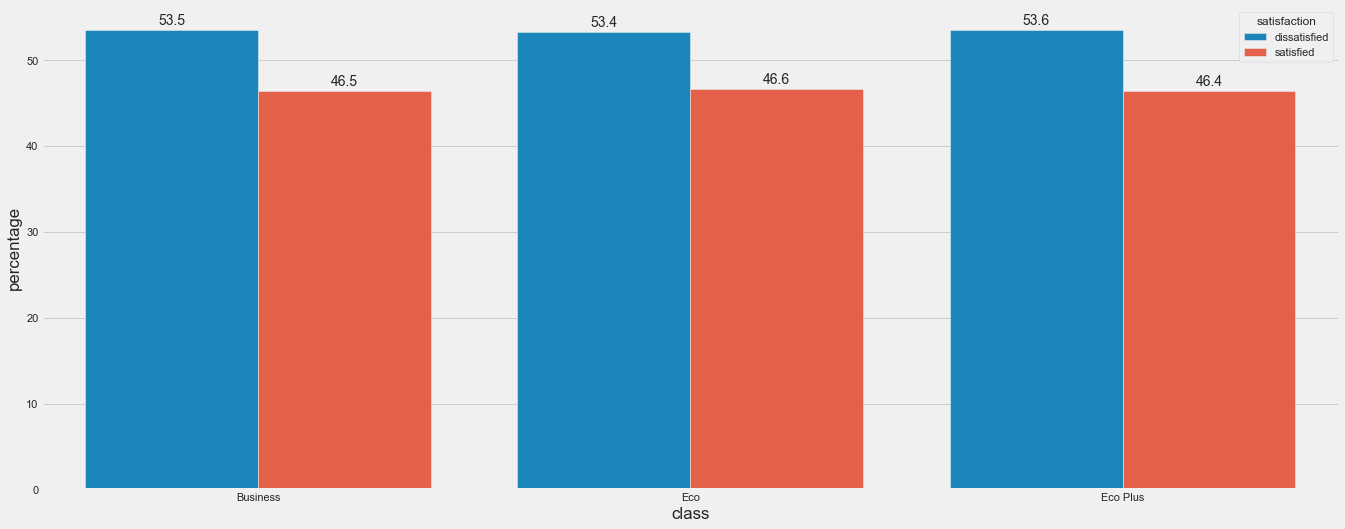

In [294]:
splot = sns.barplot(x='class',y='percentage',hue = "satisfaction",data=data_class)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Berdasarkan data ini, kita dapat melihat bahwa data class memiliki nilai yang sama
dimana mayoritas customer cenderung tidak puas dengan Invistico

akan tetapi berdasarkan jumlah data personal travel mayoritas pada class eco, maka kita hanya akan fokus pada customer eco

### ordinal data

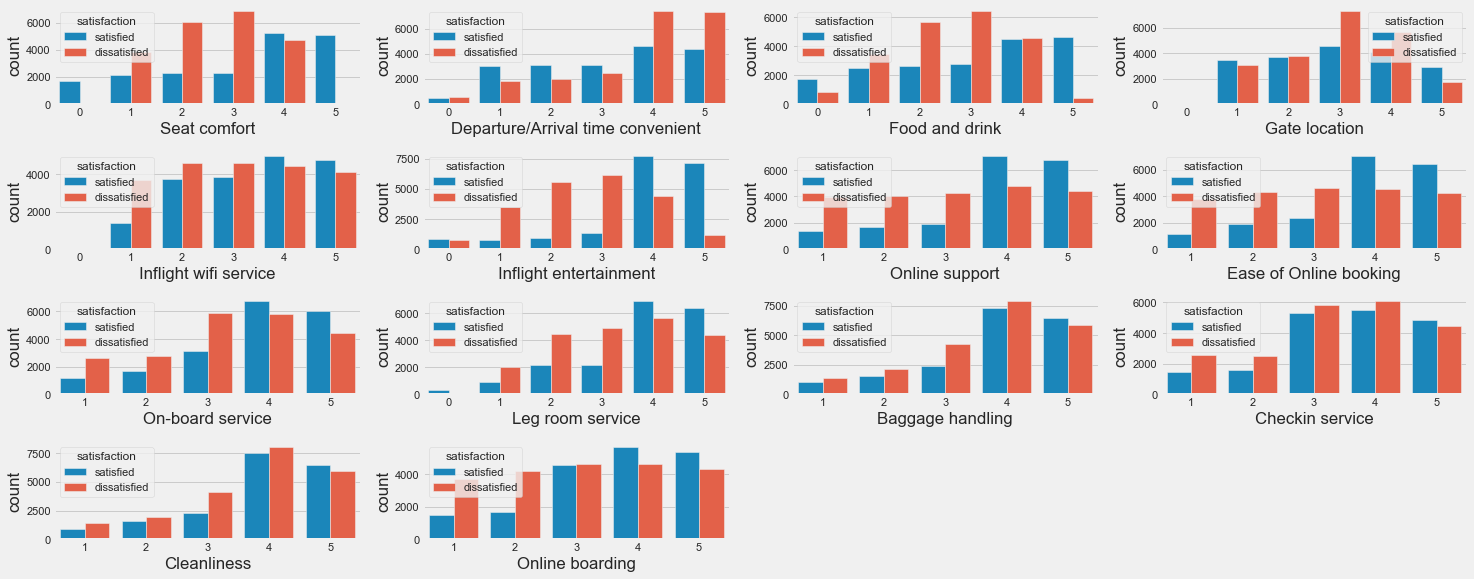

In [295]:
for i in range(0, len(ordinal)):
    plt.subplot(4, 4, i+1)
    sns.countplot(ordinal[i], hue = "satisfaction", orient='v', data=df)
    plt.tight_layout()

dari data diatas dapat kita pastikan bahwa data dari tingkat kepuasan customer pada salah satu service Invistico :
1. mayoritas data menyimpulkan jika customer puas dengan service invistico ( nilai >= 3 ) maka customer juga akan puas dengan invistico
2. tetapi terdapat service yang tidak sesuai dengan mayoritas service yang lain, yaitu :
- Departure/Arrival time convenient ( semakin puas customer, customer semakin tidak puas dengan Invistico )
- Gate Location ( walaupun customer tidak puas dengan gate location, customer tetap puas dengan  Invistico )
- Baggage Handling ( customer tetap tidak puas dengan Invistico walaupun puas dengan Baggage handling )
- Checkin Service ( customer tetap tidak puas dengan Invistico walaupun puas dengan Checkin Service )
- Cleanliness ( walaupun customer tidak puas dengan Cleanliness, customer tetap puas dengan  Invistico )

### Nominal data

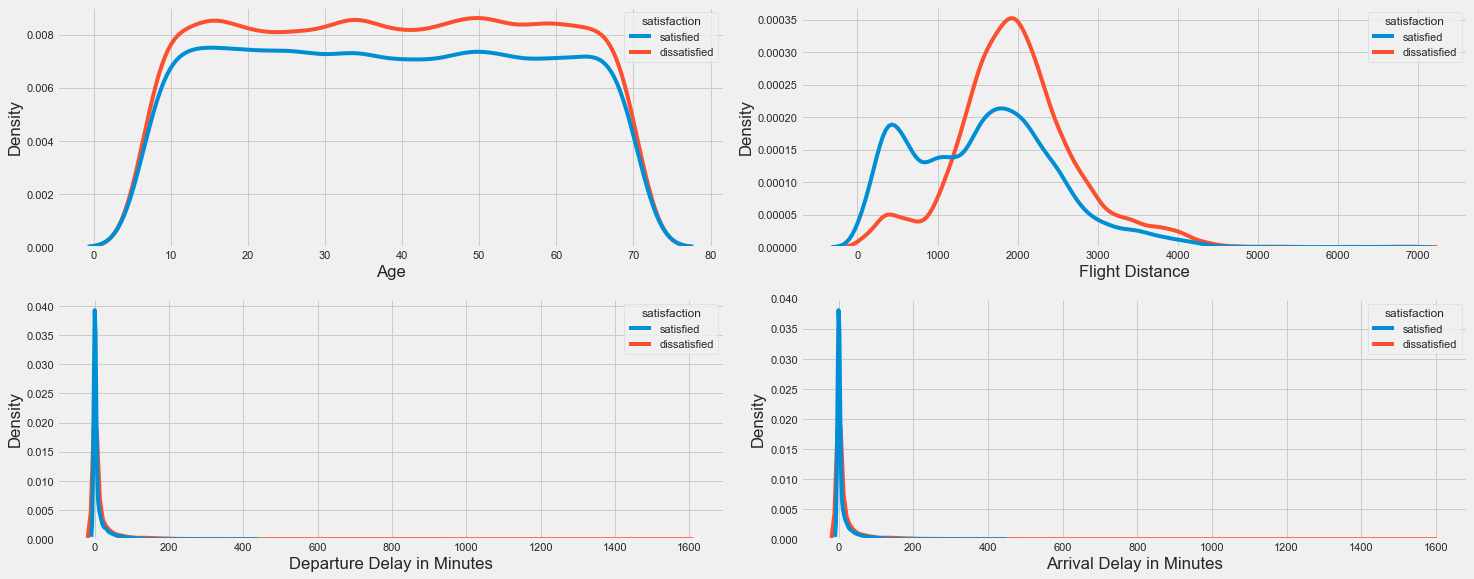

In [296]:
# nominal data
nom = ["Age",'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for i in range(0, len(nom)):
    plt.subplot(2, len(nom)/2, i+1)
    sns.kdeplot(nom[i], hue = "satisfaction", data=df)
    plt.tight_layout()

dari data ini kita dapat mengambil kesimpulan bahwa :
1. Mayoritas Customer di Invistico tidak puas dengan Invistico
2. untuk jarak dapat dilihat bahwa customer dengan jarak menengah tidak puas dengan Invistico
3. untuk Departure and Arrival akan mengakibatkan ketidakpuasan customer jika mengalami keterlambatan

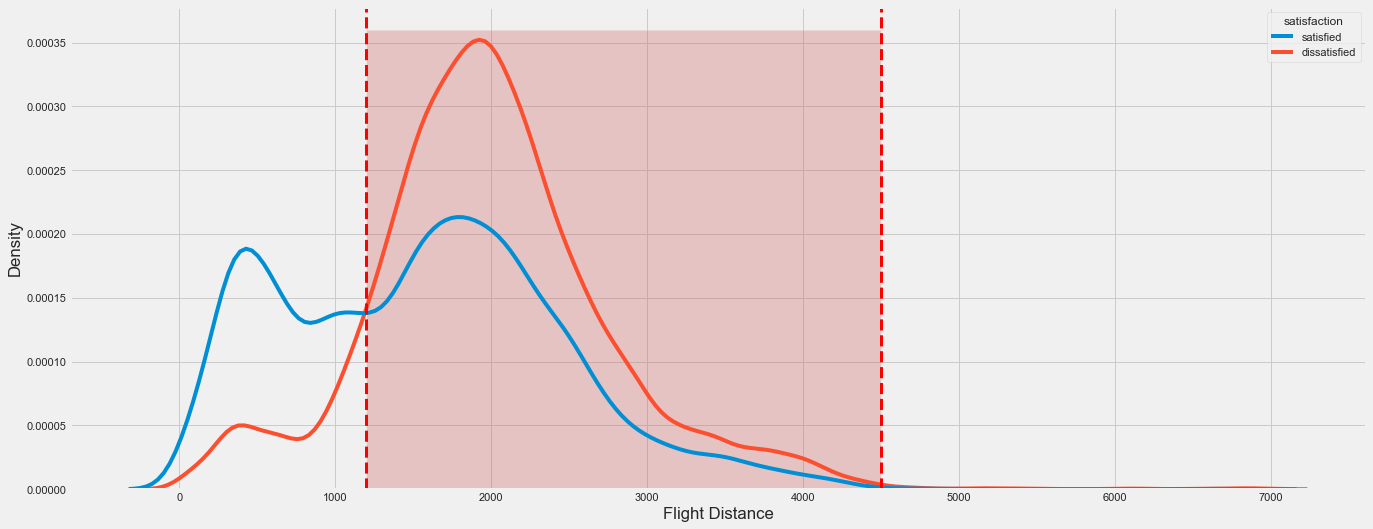

In [297]:
# check detail Flight Distance
sns.kdeplot("Flight Distance", hue = "satisfaction", data=df)
plt.stackplot(np.arange(1200, 4500 ,1), [[0.00036]], colors=('indianred',), alpha=0.3)
plt.axvline(x=1200, color='red', linestyle='--', linewidth=3)
plt.axvline(x=4500, color='red', linestyle='--', linewidth=3)

dapat di lihat bahwa customer dengan jarak penerbangan di antara 1200 - 4500 memiliki tingkat ketidakpuasan yang paling tinggi terhadap Invistico

## Data Preparation

### Missing Values

In [298]:
#pengecekan missing data di setiap feature
df_null = df.isnull().sum().reset_index()
df_null.columns = ["features", "missing_value"]
df_null

,features,missing_value
0,satisfaction,0
1,Gender,0
2,Customer Type,0
3,Age,0
4,Class,0
5,Flight Distance,0
6,Seat comfort,0
7,Departure/Arrival time convenient,0
8,Food and drink,0
9,Gate location,0


In [299]:
#persentase untuk missing value
df_null["percentage"] = round((df_null['missing_value']/len(df))*100,2)
df_null = df_null.sort_values('percentage', ascending=False).reset_index(drop=True)
df_pn = df_null[df_null["percentage"] > 0]
df_pn

,features,missing_value,percentage
0,Arrival Delay in Minutes,145,0.36


In [300]:
#delete missing values
df.dropna(inplace = True) 

#check if there is other missing value
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Semua data Null di hapus dikarenakan hanya terdapat 0.4% data yang null

### Check Duplicate Data

In [301]:
#check total duplicate data
df.duplicated().sum()

0

Tidak terdapat data duplicate

### Outliers

In [302]:
df.shape

(40042, 22)

Skewness Co-efficient: 7.857
Skewness Co-efficient: 0.93204


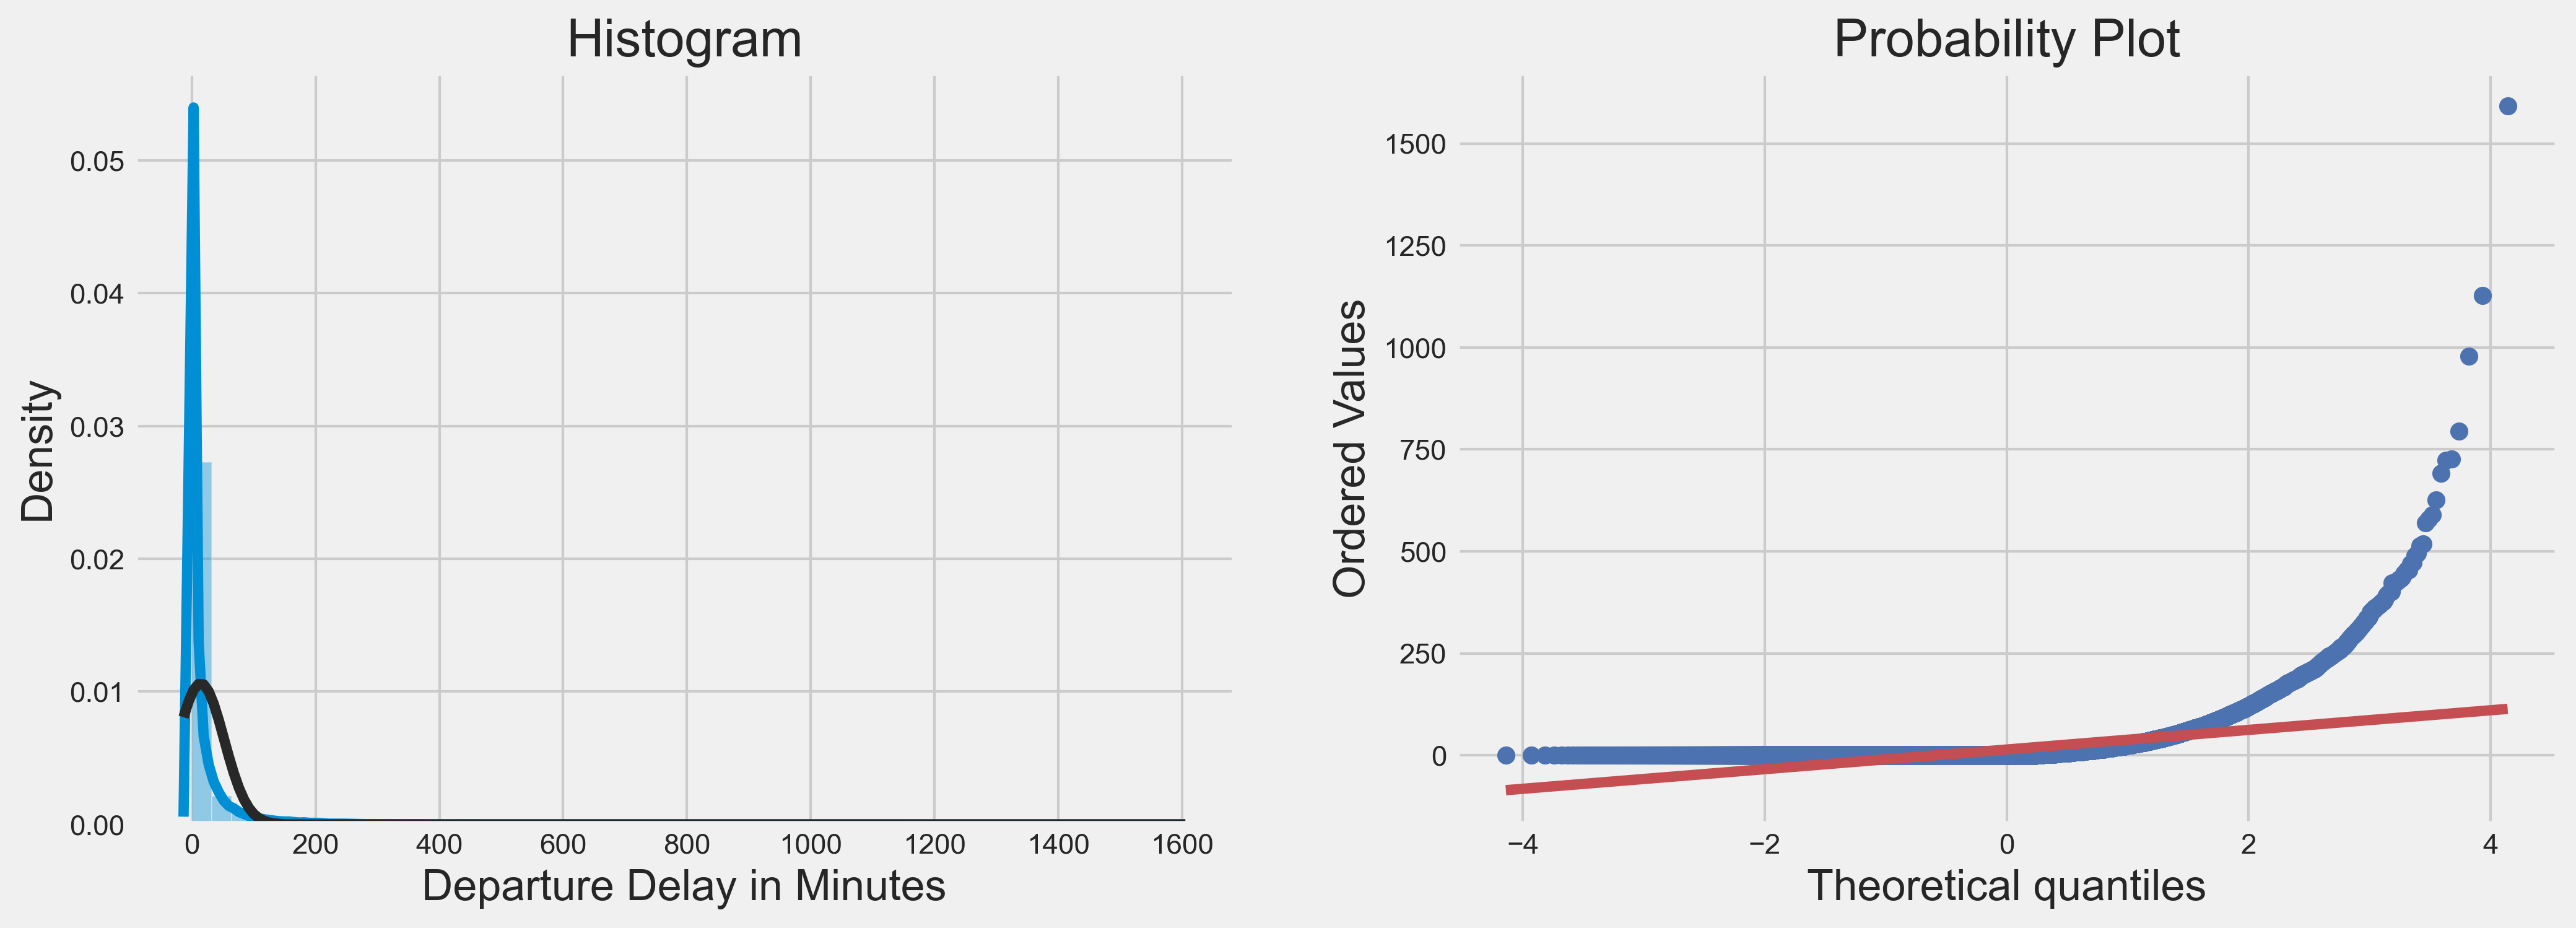

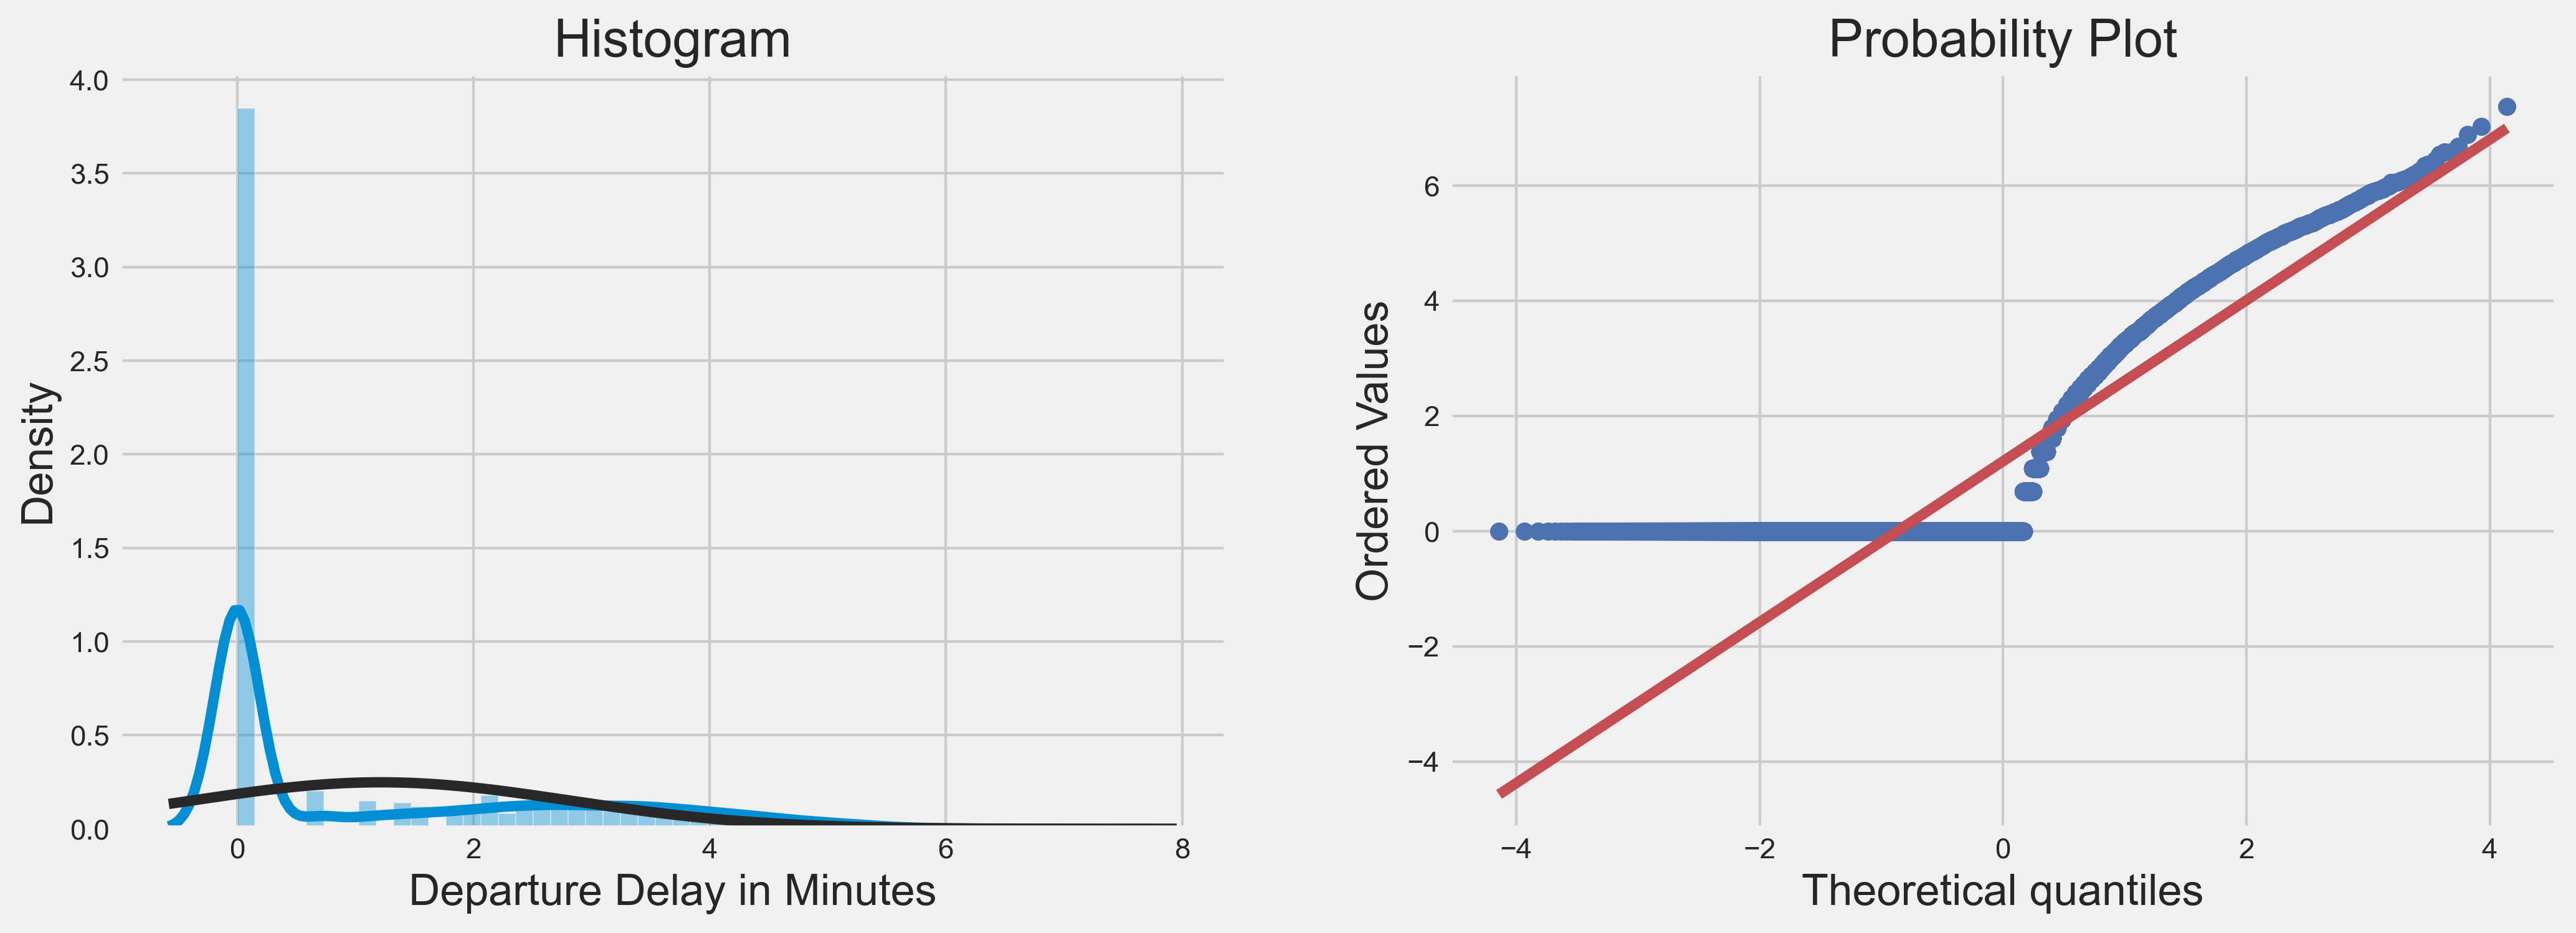

In [303]:
# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(df['Departure Delay in Minutes'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(df['Departure Delay in Minutes'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['Departure Delay in Minutes'], plot=ax2)


df["Departure Delay in Minutes"] = np.log1p(df["Departure Delay in Minutes"])

# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(df['Departure Delay in Minutes'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(df['Departure Delay in Minutes'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['Departure Delay in Minutes'], plot=ax2)

plt.show()

Skewness Co-efficient: 7.594
Skewness Co-efficient: 0.891008


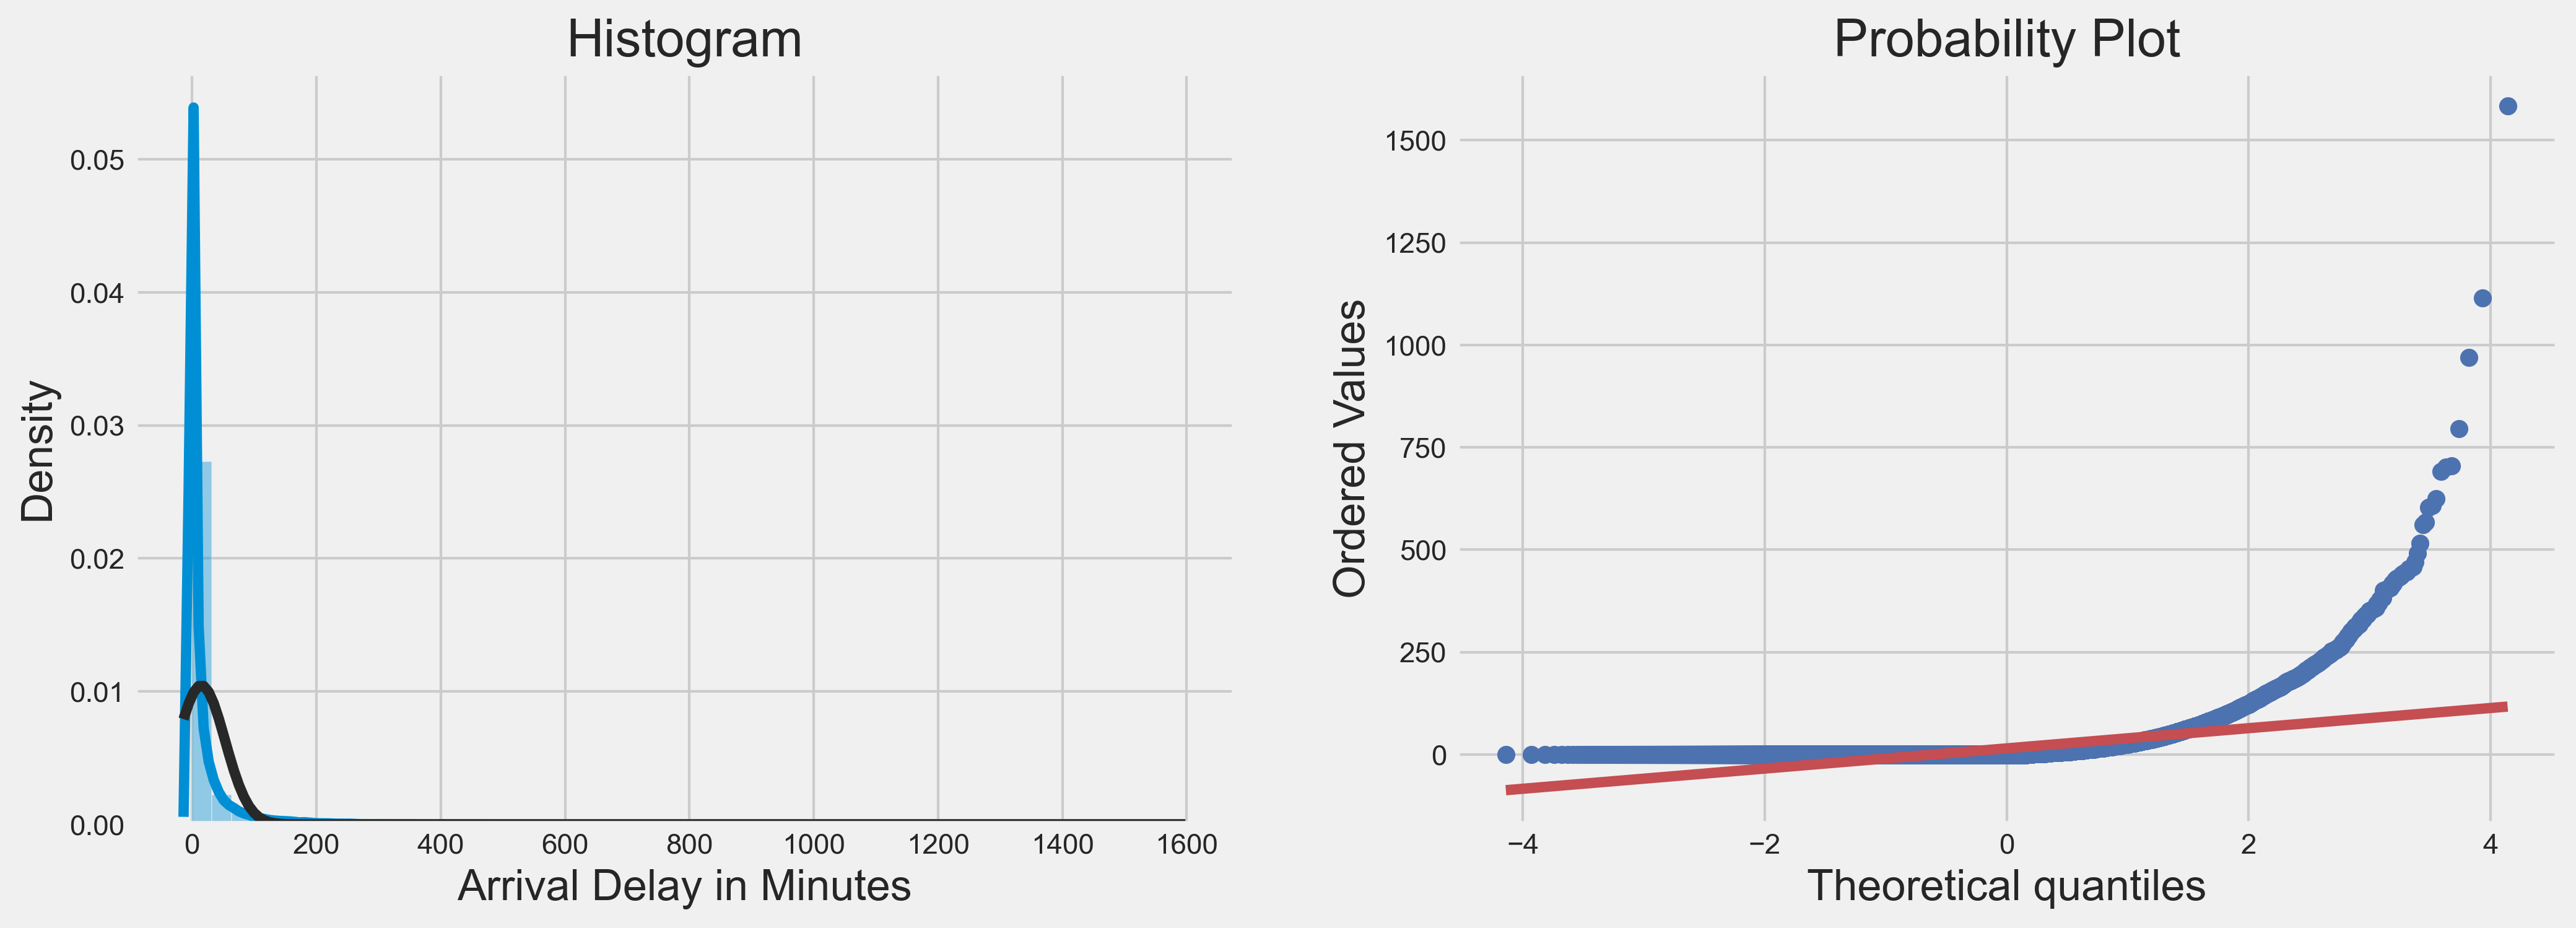

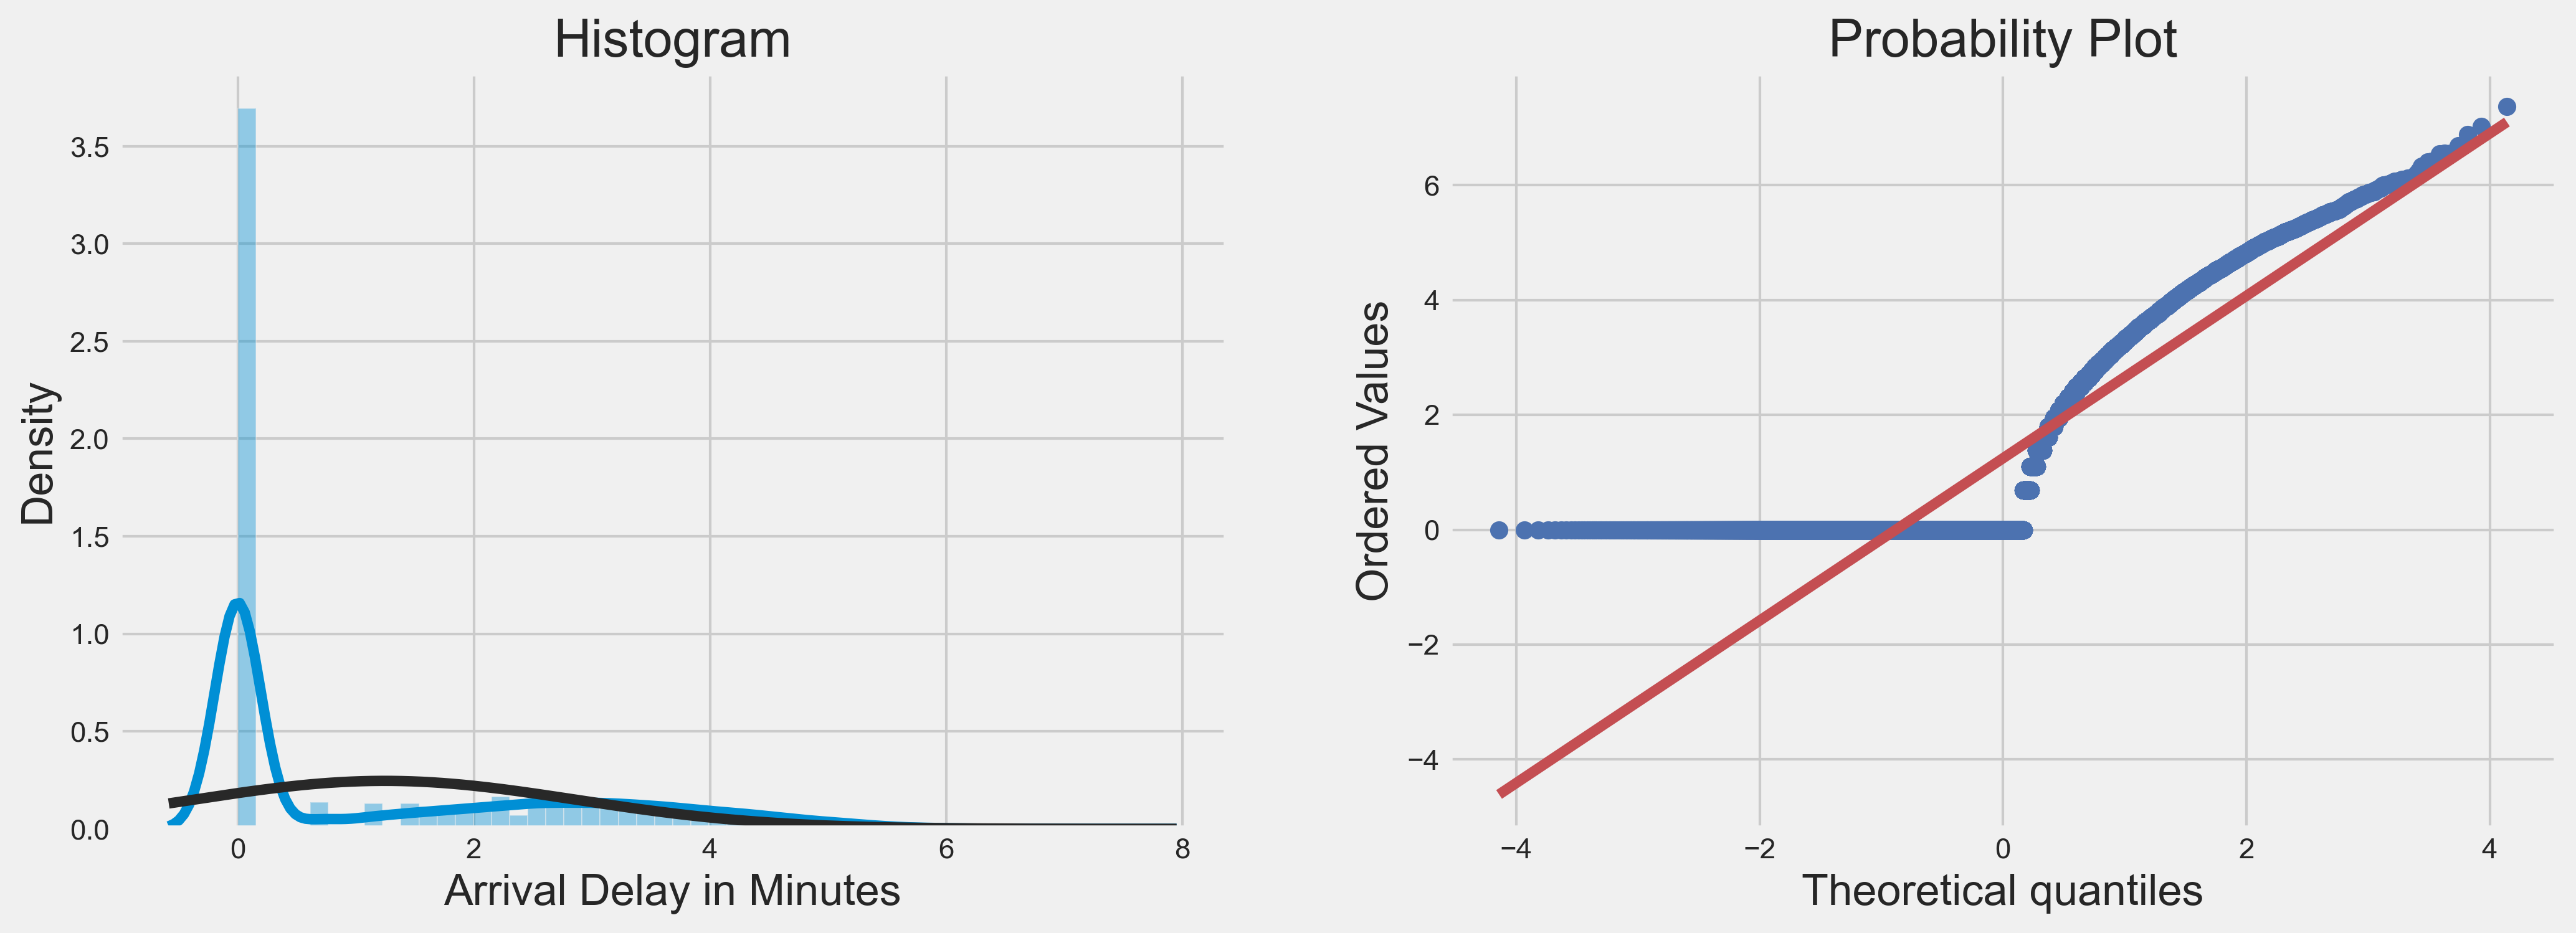

In [304]:
# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(df['Arrival Delay in Minutes'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(df['Arrival Delay in Minutes'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['Arrival Delay in Minutes'], plot=ax2)


df["Arrival Delay in Minutes"] = np.log1p(df["Arrival Delay in Minutes"])

# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(df['Arrival Delay in Minutes'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(df['Arrival Delay in Minutes'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['Arrival Delay in Minutes'], plot=ax2)

plt.show()

In [305]:
df.shape

(40042, 22)

Untuk Menghilangkan outlier yang ada, maka di lakukan proses Log sehingga feature yang memiliki outlier menjadi normal

## Feature Encoding

In [306]:
# feature target di transform menjadi 0 dan 1
satisfaction_mapping = {"satisfied": 1,"dissatisfied": 0 }
df['satisfaction']  = df['satisfaction'].map(satisfaction_mapping)

df.head()

,satisfaction,Gender,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,0.000000
1,1,Male,Loyal Customer,47,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,5.739793,5.723585
2,1,Female,Loyal Customer,15,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,0.000000
3,1,Female,Loyal Customer,60,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,0.000000
4,1,Female,Loyal Customer,70,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,0.000000


# feature ordinal di transform menjadi 0 dan 1
ordinal = ['Seat comfort', 'Food and drink','Departure/Arrival time convenient','Gate location','Inflight wifi service','Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness','Online boarding']
ordinal_mapping = {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1 }

for i in ordinal :
    df[i]  = df[i].map(ordinal_mapping)

df.head()

In [307]:
# feature Class
class_mapping = {"Business": 1,"Eco": 0, "Eco Plus" : 0 }
df['Class']  = df['Class'].map(class_mapping)

df.head()

,satisfaction,Gender,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,0.000000
1,1,Male,Loyal Customer,47,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,5.739793,5.723585
2,1,Female,Loyal Customer,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,0.000000
3,1,Female,Loyal Customer,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,0.000000
4,1,Female,Loyal Customer,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,0.000000


In [308]:
# feature Gender
gender_mapping = {"Male": 1,"Female": 0}
df['male']  = df['Gender'].map(gender_mapping)

df.head()

,satisfaction,Gender,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,male
0,1,Female,Loyal Customer,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,0.000000,0
1,1,Male,Loyal Customer,47,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,5.739793,5.723585,1
2,1,Female,Loyal Customer,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,0.000000,0
3,1,Female,Loyal Customer,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,0.000000,0
4,1,Female,Loyal Customer,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,0.000000,0


In [309]:
df = df.drop("Gender", axis=1)

In [310]:
# feature Loyal
loyal_mapping = {"Loyal Customer": 1,"disloyal Customer": 0}
df['Customer Type']  = df['Customer Type'].map(loyal_mapping)

df.head()

,satisfaction,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,male
0,1,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,0.000000,0
1,1,1,47,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,5.739793,5.723585,1
2,1,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,0.000000,0
3,1,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,0.000000,0
4,1,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,0.000000,0


In [311]:
#change jarak to categorical
def jarak(distance):
    if distance < 2000:
        return "short_distance"
    elif distance <= 4000:
        return "medium_distance"
    else: 
        return "long_distance"

distance = df["Flight Distance"]
# utilize it along with apply method
raw_distance = distance.apply(jarak)
# one hot encoding
jaraks = pd.get_dummies(raw_distance)
# re-arrange columns for convenience
jaraks = jaraks[['short_distance','medium_distance','long_distance']]
#display data
jaraks

,short_distance,medium_distance,long_distance
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
129875,1,0,0
129876,0,1,0
129877,0,1,0
129878,0,1,0


In [312]:
#join to dataframe
#input age to dataframe
df = df.join(jaraks)
df.head()

,satisfaction,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,male,short_distance,medium_distance,long_distance
0,1,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,0.000000,0,1,0,0
1,1,1,47,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,5.739793,5.723585,1,0,1,0
2,1,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,0.000000,0,0,1,0
3,1,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,0.000000,0,1,0,0
4,1,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,0.000000,0,1,0,0


In [313]:
#change age to categorical
def umur(age):
    if age <= 1:
        return "Bayi"
    elif age <= 10:
        return "Kanak-Kanak"
    elif age <= 18:
        return "Remaja"
    elif age <= 60:
        return "Dewasa"
    else: 
        return "Lansia"

ages = df.Age
# utilize it along with apply method
raw_umur = ages.apply(umur)
# one hot encoding
umurs = pd.get_dummies(raw_umur)
# re-arrange columns for convenience
umurs = umurs[['Kanak-Kanak','Remaja','Dewasa','Lansia']]
#display data
umurs

,Kanak-Kanak,Remaja,Dewasa,Lansia
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
129875,0,0,1,0
129876,0,0,0,1
129877,0,0,0,1
129878,0,0,0,1


In [314]:
#input age to dataframe
df = df.join(umurs)
df.head()

,satisfaction,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,male,short_distance,medium_distance,long_distance,Kanak-Kanak,Remaja,Dewasa,Lansia
0,1,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,0.000000,0,1,0,0,0,0,0,1
1,1,1,47,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,5.739793,5.723585,1,0,1,0,0,0,1,0
2,1,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,0.000000,0,0,1,0,0,1,0,0
3,1,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,0.000000,0,1,0,0,0,0,1,0
4,1,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,0.000000,0,1,0,0,0,0,0,1


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40042 entries, 0 to 129879
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       40042 non-null  int64  
 1   Customer Type                      40042 non-null  int64  
 2   Age                                40042 non-null  int64  
 3   Class                              40042 non-null  int64  
 4   Flight Distance                    40042 non-null  int64  
 5   Seat comfort                       40042 non-null  int64  
 6   Departure/Arrival time convenient  40042 non-null  int64  
 7   Food and drink                     40042 non-null  int64  
 8   Gate location                      40042 non-null  int64  
 9   Inflight wifi service              40042 non-null  int64  
 10  Inflight entertainment             40042 non-null  int64  
 11  Online support                     40042 non-null  in

## Feature Selection

In [316]:
df_eco = df[df["Class"] == 0]
df_eco = df_eco.drop("Class", axis=1)
df_eco.shape

(37377, 28)

Berdasarkan total data pada Class, mayoritas personal customer menggunakan class Eco
maka kita akan fokus pada class Eco dan Eco Plus

In [317]:
#check feature correlation
corelation = df_eco.corr()
corelation

,satisfaction,Customer Type,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,male,short_distance,medium_distance,long_distance,Kanak-Kanak,Remaja,Dewasa,Lansia
satisfaction,1.000000,0.043261,-0.006782,-0.265518,0.227002,-0.186054,0.177779,0.005463,0.147513,0.465278,0.294415,0.291547,0.188989,0.194294,0.084778,0.094579,0.084348,0.210005,-0.076183,-0.086654,-0.734177,0.156587,-0.150830,-0.030983,0.000753,0.005017,-0.005025,0.001470
Customer Type,0.043261,1.000000,-0.005750,-0.027535,0.016135,-0.010286,0.015562,0.002327,0.005101,0.036213,0.020084,0.016026,0.009829,0.017627,0.004027,0.010692,0.000832,0.010374,0.002803,0.008614,-0.001648,0.021072,-0.018792,-0.011381,0.004241,0.003162,0.000592,-0.006547
Age,-0.006782,-0.005750,1.000000,-0.318433,-0.009938,0.002802,-0.005781,-0.000827,0.014383,0.003737,0.036118,0.007661,-0.010886,0.020777,-0.030457,0.002900,-0.025838,0.018892,-0.006111,-0.006033,0.002289,0.181185,-0.176202,-0.027803,-0.419086,-0.494091,0.083901,0.627380
Flight Distance,-0.265518,-0.027535,-0.318433,1.000000,-0.100571,0.047534,-0.067710,-0.011814,-0.084691,-0.165532,-0.148304,-0.103152,-0.060468,-0.082648,0.006650,-0.045226,-0.004842,-0.096605,0.063149,0.044279,0.329385,-0.757787,0.696160,0.311727,0.083193,0.134049,-0.009550,-0.167096
Seat comfort,0.227002,0.016135,-0.009938,-0.100571,1.000000,0.263585,0.819387,0.324593,0.054552,0.487248,0.053465,0.083578,0.038567,0.122140,0.012475,-0.012044,0.011659,0.039096,-0.039961,-0.044905,-0.253360,0.065340,-0.061955,-0.017636,0.000159,0.004753,0.006310,-0.012794
Departure/Arrival time convenient,-0.186054,-0.010286,0.002802,0.047534,0.263585,1.000000,0.264426,0.302739,-0.040748,-0.068632,-0.067091,-0.075477,0.116474,0.008219,0.143214,0.157357,0.148481,-0.044485,0.002967,-0.000626,0.151948,-0.030374,0.032502,-0.009540,-0.003597,-0.003020,0.006963,-0.003953
Food and drink,0.177779,0.015562,-0.005781,-0.067710,0.819387,0.264426,1.000000,0.313488,0.047349,0.577328,0.057078,0.052346,0.037043,0.132846,0.018478,0.015675,0.019892,0.034018,-0.039038,-0.042086,-0.211320,0.035141,-0.032509,-0.013374,0.002713,-0.000380,0.007990,-0.011979
Gate location,0.005463,0.002327,-0.000827,-0.011814,0.324593,0.302739,0.313488,1.000000,0.004540,0.014078,0.015767,0.011963,-0.036854,-0.009499,0.008611,-0.046462,0.001567,0.006565,-0.000005,-0.001322,-0.028003,0.008868,-0.008887,-0.000102,0.006323,-0.005574,0.005342,-0.006124
Inflight wifi service,0.147513,0.005101,0.014383,-0.084691,0.054552,-0.040748,0.047349,0.004540,1.000000,0.144029,0.601215,0.692321,0.015952,0.002719,0.000313,0.041409,0.007489,0.726595,-0.029781,-0.033680,-0.135784,0.054117,-0.048923,-0.026062,-0.006030,-0.006809,0.004913,0.003878
Inflight entertainment,0.465278,0.036213,0.003737,-0.165532,0.487248,-0.068632,0.577328,0.014078,0.144029,1.000000,0.313859,0.199538,0.107671,0.128832,0.047214,0.146909,0.040956,0.238653,-0.022123,-0.019393,-0.494492,0.088563,-0.086536,-0.011635,-0.001189,0.000833,-0.000072,0.000124


<AxesSubplot:>

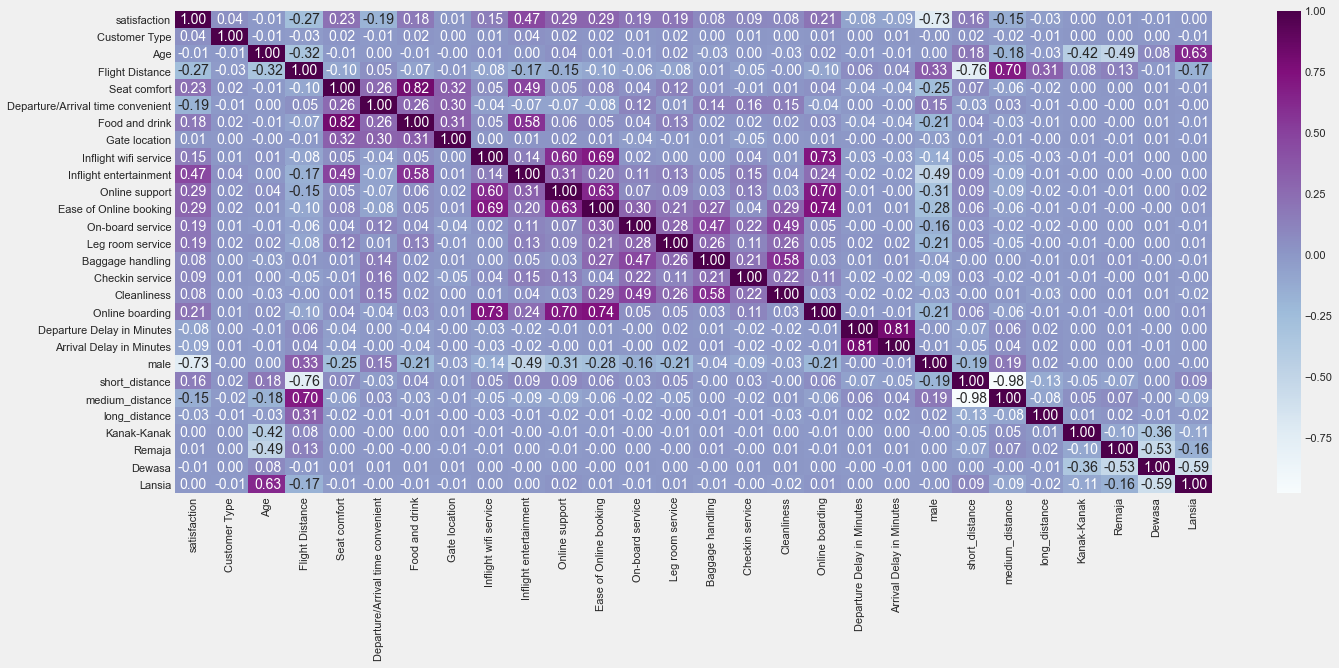

In [318]:
#use heatmap to show the correlation
sns.heatmap(corelation, annot=True, fmt = ".2f", cmap = "BuPu" )

Berdasarkan data heatmap diatas,
kita akan drop feature yang memiliki korelasi sangat tinggi dengan feature lain, yaitu :
1. Departure Delay
2. short
3. Online Boarding
4. Food and Drink

serta kita juga akan menghapus service yang tidak bisa di ubah oleh maskapai Invistico, dikarenakan service tersebut tersedia dari Bandara
1. Gate Location

data tidak seimbang :
1. Customer Type
2. Class

In [319]:
df_eco_clean = df_eco.drop(["Arrival Delay in Minutes","Customer Type","Age", "Kanak-Kanak", "Flight Distance", "short_distance", "Departure Delay in Minutes", "Online boarding", "Food and drink", "Gate location","Lansia"], axis=1)
df_eco_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37377 entries, 0 to 129879
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   satisfaction                       37377 non-null  int64
 1   Seat comfort                       37377 non-null  int64
 2   Departure/Arrival time convenient  37377 non-null  int64
 3   Inflight wifi service              37377 non-null  int64
 4   Inflight entertainment             37377 non-null  int64
 5   Online support                     37377 non-null  int64
 6   Ease of Online booking             37377 non-null  int64
 7   On-board service                   37377 non-null  int64
 8   Leg room service                   37377 non-null  int64
 9   Baggage handling                   37377 non-null  int64
 10  Checkin service                    37377 non-null  int64
 11  Cleanliness                        37377 non-null  int64
 12  male             

## Class Imbalance

In [320]:
df_target2 = df_eco_clean.groupby("satisfaction").agg({"male" : "count"}).reset_index()
df_target2.head()

,satisfaction,male
0,0,19942
1,1,17435


In [321]:
df_target2.columns = ["satisfaction", "jumlah"]
df_target2["total"] = sum(df_target2['jumlah'])
df_target2["percentage"] = df_target2["jumlah"] / df_target2["total"] * 100
df_target2.head()

,satisfaction,jumlah,total,percentage
0,0,19942,37377,53.353667
1,1,17435,37377,46.646333


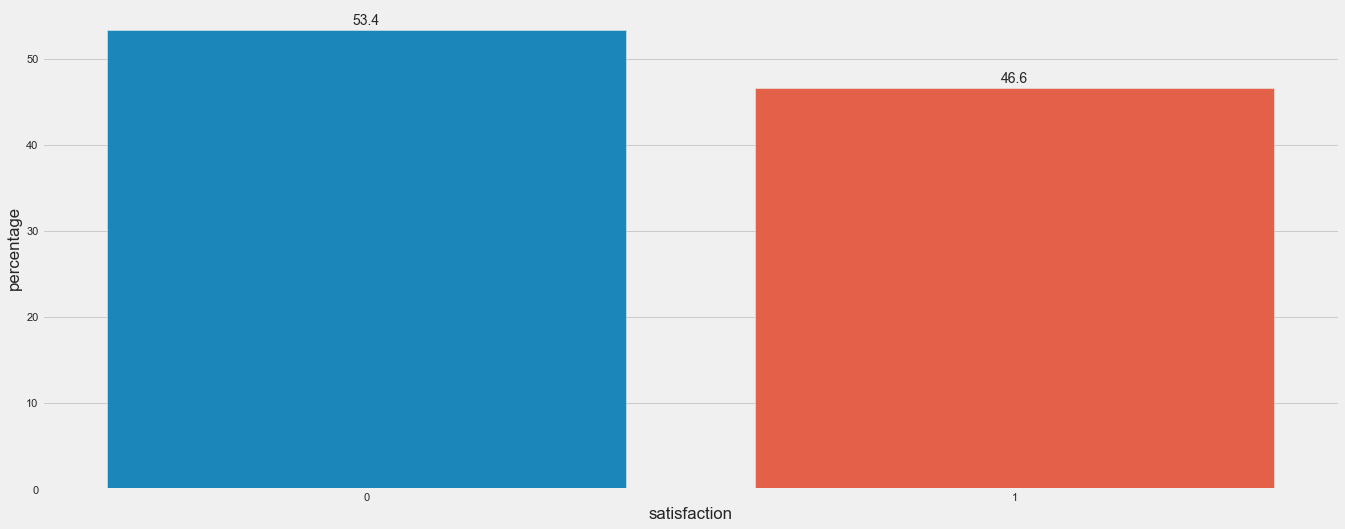

In [322]:
splot = sns.barplot(x='satisfaction',y='percentage',data=df_target2)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

dari grafik target diatas, dapat disimpulkan data target sangat normal.
dimana persentase antara target tidak terlalu jauh, yaitu :
disastified customer  : 53.4%
satisfied customer : 46.6%

## Modelling

In [323]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [324]:
X = df_eco_clean.drop(columns=['satisfaction']) # menggunakan semua feature kecuali target
y = df_eco_clean['satisfaction']

In [325]:
# membagi dataframe menjadi data train dan data test ( dengan perbandingan 7 : 3 )
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [326]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11214 entries, 35181 to 33819
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Seat comfort                       11214 non-null  int64
 1   Departure/Arrival time convenient  11214 non-null  int64
 2   Inflight wifi service              11214 non-null  int64
 3   Inflight entertainment             11214 non-null  int64
 4   Online support                     11214 non-null  int64
 5   Ease of Online booking             11214 non-null  int64
 6   On-board service                   11214 non-null  int64
 7   Leg room service                   11214 non-null  int64
 8   Baggage handling                   11214 non-null  int64
 9   Checkin service                    11214 non-null  int64
 10  Cleanliness                        11214 non-null  int64
 11  male                               11214 non-null  int64
 12  medium_distanc

In [327]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26163 entries, 7837 to 16970
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Seat comfort                       26163 non-null  int64
 1   Departure/Arrival time convenient  26163 non-null  int64
 2   Inflight wifi service              26163 non-null  int64
 3   Inflight entertainment             26163 non-null  int64
 4   Online support                     26163 non-null  int64
 5   Ease of Online booking             26163 non-null  int64
 6   On-board service                   26163 non-null  int64
 7   Leg room service                   26163 non-null  int64
 8   Baggage handling                   26163 non-null  int64
 9   Checkin service                    26163 non-null  int64
 10  Cleanliness                        26163 non-null  int64
 11  male                               26163 non-null  int64
 12  medium_distance

### Random Forest

In [328]:
# random forest process to classification data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.94
Recall (Test Set): 0.92
F1-Score (Test Set): 0.93
AUC: 0.93


In [329]:
print("Precision (Train Set): %.2f" % precision_score(y_pred, y_test))

Precision (Train Set): 0.92


In [330]:
print("train Accuracy : ",rf.score(X_train,y_train))
print("test Accuracy : ",rf.score(X_test,y_test))

train Accuracy :  0.9967893590184612
test Accuracy :  0.9311574817192795


Data terlihat overfitting

In [331]:
#confusion matrix before tuning
from sklearn.metrics import confusion_matrix # import package dari sklearn
confusion_matrix(y_test, y_pred) # lihat hasil confusion matrix-nya

array([[5614,  334],
       [ 438, 4828]], dtype=int64)

Melakukan tuning pada precision untuk meningkatkan hasil precision dari machine learning

In [332]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.94
Recall (Test Set): 0.92
F1-Score (Test Set): 0.93
AUC: 0.93


In [333]:
y_pred_train = rf_tuned.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.99


In [334]:
print("train Accuracy : ",rf_tuned.score(X_train,y_train))
print("test Accuracy : ",rf_tuned.score(X_test,y_test))

train Accuracy :  0.990693460714874
test Accuracy :  0.9393114180120599


Setelah melakukan tuning hasil menjadi bagus, akan tetapi masih berada pada overfitting

In [335]:
#confusion matrix after tuning
from sklearn.metrics import confusion_matrix # import package dari sklearn
confusion_matrix(y_test, y_pred) # lihat hasil confusion matrix-nya

array([[5636,  312],
       [ 437, 4829]], dtype=int64)

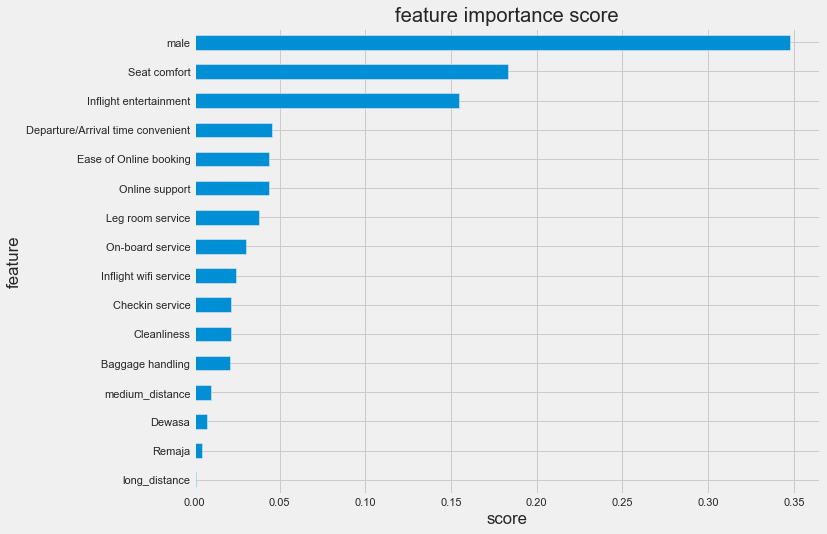

In [336]:
#feature importance after tuning
show_feature_importance(rf_tuned.best_estimator_)
plt.savefig("feature importance random forest")

Melihat dari Feature Importance model ini,
dapat disimpulkan service yang sebaik nya di tingkatkan adalah :
1. Inflight entertaiment
2. Ease Online Booking
3. Online Support

### Logistic Regression

#### Split train test data

In [337]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [338]:
# Split Feature and Label
X = df_eco_clean.drop(columns=['satisfaction']) # menggunakan semua feature kecuali target
y = df_eco_clean['satisfaction']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [339]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11214 entries, 35181 to 33819
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Seat comfort                       11214 non-null  int64
 1   Departure/Arrival time convenient  11214 non-null  int64
 2   Inflight wifi service              11214 non-null  int64
 3   Inflight entertainment             11214 non-null  int64
 4   Online support                     11214 non-null  int64
 5   Ease of Online booking             11214 non-null  int64
 6   On-board service                   11214 non-null  int64
 7   Leg room service                   11214 non-null  int64
 8   Baggage handling                   11214 non-null  int64
 9   Checkin service                    11214 non-null  int64
 10  Cleanliness                        11214 non-null  int64
 11  male                               11214 non-null  int64
 12  medium_distanc

In [340]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26163 entries, 7837 to 16970
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Seat comfort                       26163 non-null  int64
 1   Departure/Arrival time convenient  26163 non-null  int64
 2   Inflight wifi service              26163 non-null  int64
 3   Inflight entertainment             26163 non-null  int64
 4   Online support                     26163 non-null  int64
 5   Ease of Online booking             26163 non-null  int64
 6   On-board service                   26163 non-null  int64
 7   Leg room service                   26163 non-null  int64
 8   Baggage handling                   26163 non-null  int64
 9   Checkin service                    26163 non-null  int64
 10  Cleanliness                        26163 non-null  int64
 11  male                               26163 non-null  int64
 12  medium_distance

In [341]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Prediction result

In [342]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [343]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

#### Evaluation

In [344]:
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.83
Recall (Test Set): 0.87
F1-Score (Test Set): 0.85
AUC: 0.86


In [345]:
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.84


In [346]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8613691090471276
Test score:0.8565186374175138


Hyperparameter Tuning pada precision untuk meningkatkan hasil pada precision

In [347]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.84
Recall (Test Set): 0.84
F1-Score (Test Set): 0.84
AUC: 0.85


In [348]:
y_pred_train = model.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.84


In [349]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [350]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8433596318211702
Test score:0.8386666666666667


Hasil yang di dapatkan sangat baik dikarenakan tidak ada overfitting pada hasil

In [351]:
#melihat korelasi

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.356670
         Iterations 6
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.484     
Dependent Variable:        satisfaction          AIC:                   26694.5412
Date:                      2021-06-11 21:58      BIC:                   26831.0022
No. Observations:          37377                 Log-Likelihood:        -13331.   
Df Model:                  15                    LL-Null:               -25824.   
Df Residuals:              37361                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            6.0000                                                 
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

Berdasarkan koefisien setiap feature yang ada, dapat disimpulkan service yang sebaiknya di tingkatkan adalah :
1. Inflight Entertaiment
2. Ease Online Booking
3. On-Board Service

## Boosting : Adaboost

#### Split train test data

In [352]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [353]:
# Split Feature and Label
X = df_eco_clean.drop(columns=['satisfaction']) # menggunakan semua feature kecuali target
y = df_eco_clean['satisfaction']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [354]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11214 entries, 35181 to 33819
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Seat comfort                       11214 non-null  int64
 1   Departure/Arrival time convenient  11214 non-null  int64
 2   Inflight wifi service              11214 non-null  int64
 3   Inflight entertainment             11214 non-null  int64
 4   Online support                     11214 non-null  int64
 5   Ease of Online booking             11214 non-null  int64
 6   On-board service                   11214 non-null  int64
 7   Leg room service                   11214 non-null  int64
 8   Baggage handling                   11214 non-null  int64
 9   Checkin service                    11214 non-null  int64
 10  Cleanliness                        11214 non-null  int64
 11  male                               11214 non-null  int64
 12  medium_distanc

In [355]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26163 entries, 7837 to 16970
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Seat comfort                       26163 non-null  int64
 1   Departure/Arrival time convenient  26163 non-null  int64
 2   Inflight wifi service              26163 non-null  int64
 3   Inflight entertainment             26163 non-null  int64
 4   Online support                     26163 non-null  int64
 5   Ease of Online booking             26163 non-null  int64
 6   On-board service                   26163 non-null  int64
 7   Leg room service                   26163 non-null  int64
 8   Baggage handling                   26163 non-null  int64
 9   Checkin service                    26163 non-null  int64
 10  Cleanliness                        26163 non-null  int64
 11  male                               26163 non-null  int64
 12  medium_distance

In [356]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.89
Recall (Test Set): 0.91
F1-Score (Test Set): 0.90
AUC: 0.90


In [357]:
print('Train score: ' + str(ab.score(X_train, y_train))) #accuracy
print('Test score:' + str(ab.score(X_test, y_test))) #accuracy

Train score: 0.9092993922715285
Test score:0.9025325485999643


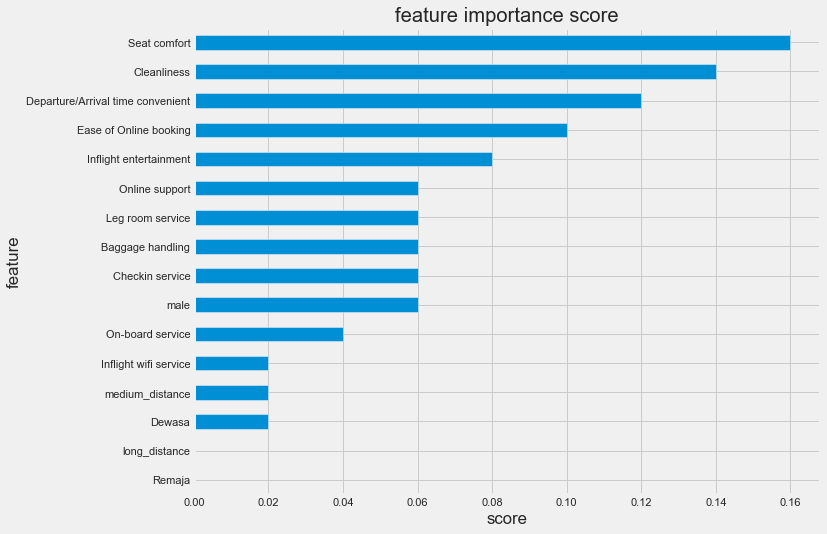

In [358]:
show_feature_importance(ab)

Feature Importance yang didapatkan sebelum melakukan tuning

Melakukan tuning pada matrix precision untuk meningkatkan hasil dari machine learning

In [359]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )
# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='precision')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.89
Recall (Test Set): 0.91
F1-Score (Test Set): 0.90
AUC: 0.90


In [360]:
print('Train score: ' + str(ab_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(ab_tuned.score(X_test, y_test))) #accuracy

Train score: 0.8918853840597158
Test score:0.8859795728876508


Hasil sangat bagus karena tidak overfitting

In [361]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


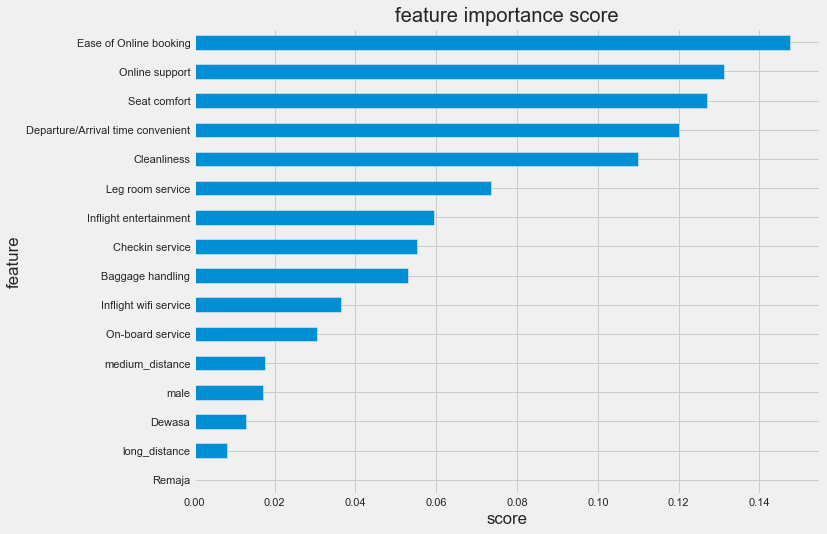

In [362]:
show_feature_importance(ab_tuned.best_estimator_)

Setelah melakukan tuning, kita mendapatkan service yang sebaik nya ditingkatkan adalah
1. Ease Online Booking
2. Online Support
3. Seat Comfort

### XGBoost

In [363]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [364]:
# Split Feature and Label
X = df_eco_clean.drop(columns=['satisfaction']) # menggunakan semua feature kecuali target
y = df_eco_clean['satisfaction']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [365]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pd.set_option("max_column",100)
pd.set_option("max_colwidth",1000)
pd.set_option("max_row",1000)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [366]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [367]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

[22:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.93
Precision (Test Set): 0.94
Recall (Test Set): 0.91
F1-Score (Test Set): 0.93
AUC: 0.93


In [368]:
confusion_matrix(y_test, y_pred)

array([[5632,  316],
       [ 460, 4806]], dtype=int64)

In [369]:
print('Train score: ' + str(xg.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg.score(X_test, y_test))) #accuracy

Train score: 0.9647593930359668
Test score:0.930800784733369


In [370]:
y_pred_train = xg.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.97


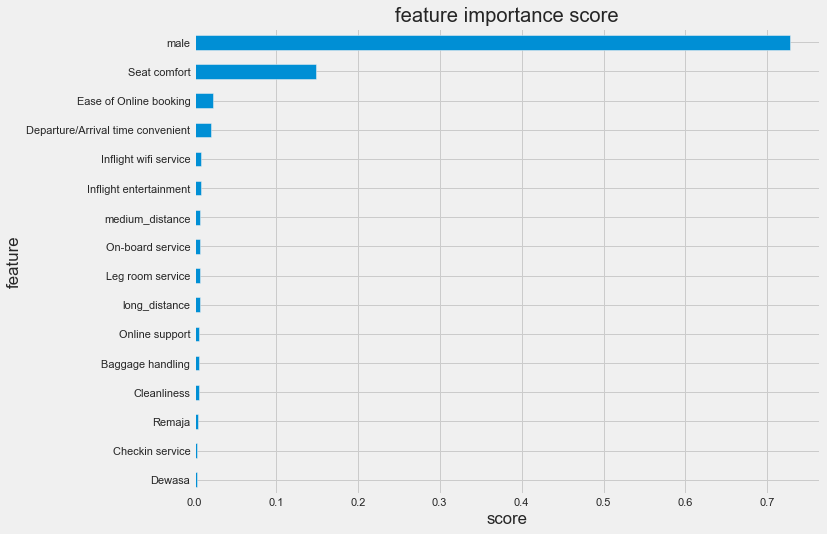

In [371]:
show_feature_importance(xg)

feature importance sebelum melakukan tuning

Hyperparameter Tuning

In [372]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='precision')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

[22:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Waktu running sekitar 0,5 jam

In [373]:
confusion_matrix(y_test, y_pred)

array([[5625,  323],
       [ 460, 4806]], dtype=int64)

In [374]:
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.94
Recall (Test Set): 0.91
F1-Score (Test Set): 0.92
AUC: 0.93


In [375]:
print('Train score: ' + str(xg_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg_tuned.score(X_test, y_test))) #accuracy

Train score: 0.9612101749345052
Test score:0.9370247611620199


Hasil model mengarah pada overfitting dimana nilai score train memiliki nilai yang jauh 

In [376]:
y_pred_train = xg_tuned.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.96


In [377]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 50
Best min_child_weight: 20
Best gamma: 0.1
Best tree_method: hist
Best colsample_bytree: 0.8
Best eta: 0.20202020202020204
Best lambda: 0.4
Best alpha: 0.7000000000000001


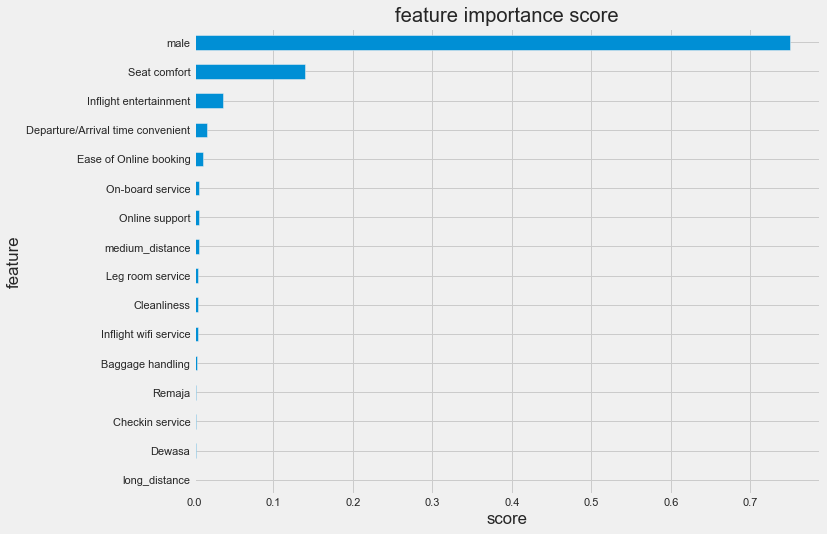

In [378]:
show_feature_importance(xg_tuned.best_estimator_)

dari grafik feature importance, dari model ini kita dapat merekomendasikan service yang perlu ditingkatkan adalah :
1. Seat Comfort
2. Inflight Entertaiment
3. Ease of Online Booking

# Decision Tree

In [379]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [380]:
# Split Feature and Label
X = df_eco_clean.drop(columns=['satisfaction']) # menggunakan semua feature kecuali target
y = df_eco_clean['satisfaction']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [381]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.91
Recall (Test Set): 0.91
F1-Score (Test Set): 0.91
AUC: 0.91


In [382]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9967893590184612
Test score:0.9144818976279651


Melakukan tuning untuk meningkatkan nilai precision pada model

In [383]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.92
Recall (Test Set): 0.91
F1-Score (Test Set): 0.91
AUC: 0.92


In [384]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 79
Best min_samples_split: 2
Best min_samples_leaf: 10
Best max_features: sqrt


In [385]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.9344029414222446
Test score:0.9177871686515559


nilai bisa di bilang baik dikarenakan nilai antara train dan test tidak terlalu jauh

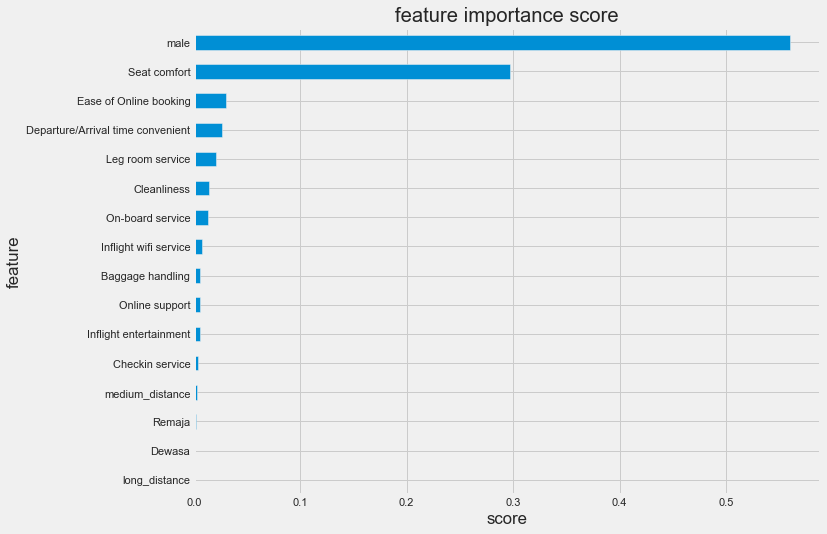

In [386]:
show_feature_importance(model.best_estimator_)

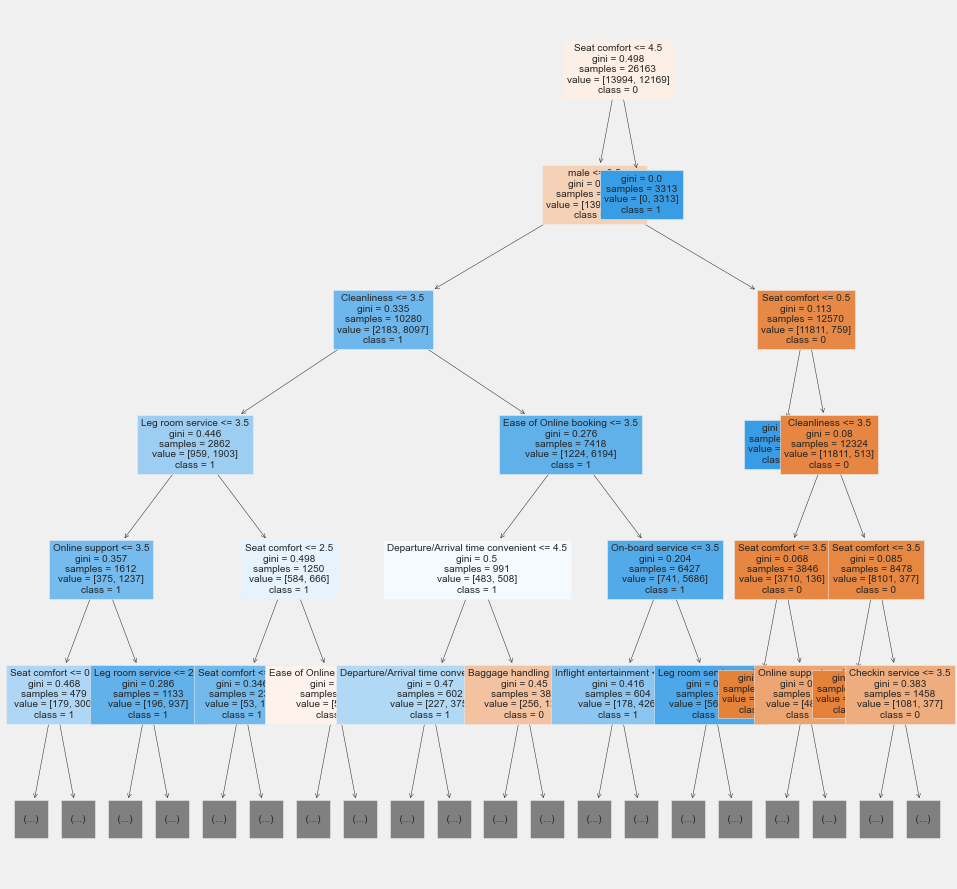

In [387]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

dari hasil model ini kita dapat memberikan rekomendasi service yang perlu di tingkatkan adalah :
1. Seat Comfort
2. Ease Online Booking
3. Leg Room